# Airline Passenger Satisfaction

## Table of contents
---------------------------------------------
* Project Methodology  
    - 01. Import CPU Python Libraries 
    - 02. Function Helper
    - 03. Import Dataset & Data Description
    - 04. Data Understanding
    - 05. Select the Featurs
    - 06. Data Pre-Processing
    - 07. Exploratory Data Analysis
    - 08. Data Transformation
    - 9. Feature Selection
    - 10. Feature Engineering 
    - 11. Statistics
    - 12. Resampling Data
    - 13. Data Splitting 
    - 14. Machine Learning Models 
    - 15. Accuracy Score Summary 
---------------------------------------------


## Methodology  

* 01. Import CPU Python Libraries 
--------------------------------------
* 02. Function Helper
--------------------------------------
* 03. Import Dataset & Data Description
        - Import CSV File
        - Data Description
--------------------------------------
* 04. Data Understanding
        - Data Information
        - Data Summary Statistic
        - Data Variance
--------------------------------------
* 05. Select the Featurs
--------------------------------------
* 06. Data Pre-Processing
        -  Drop Variables 
        - Convert Data Type
        - Missing Value
--------------------------------------
* 07. Exploratory Data Analysis
        - DV Visualization
        - Categorical IDV
        - Categorical IDV With DV
        - Numerical IDV
        - Numerical IDV With DV
--------------------------------------
* 08. Data Transformation
        - Standard Scaler
--------------------------------------
* 9. Feature Selection
        - Wrapper - Forward
--------------------------------------
* 10. Feature Engineering 
        - LableEncoder
--------------------------------------
* 11. Statistics
        - Correlations IDV with DV
        - Correlation between all the Variables
--------------------------------------
* 12. Resampling Data
        - SMOTE
--------------------------------------
* 13. Data Splitting 
--------------------------------------
* 14. Standard Machine Learning Models 
        - Build the Models 'Train the Models'
        -        Random Forest Classifier
        -        Gradient Boosting Classifier
        -        Histogram-based Gradient Boosting Classification Tree
        -        AdaBoost Classifier
        -        Extra Trees Classifier
        -        K Neighbors Classifier
        -        Naive Bayes Classifiers
        -        Naive Bayes Classifier for Multivariate Bernoulli
        -        Decision Tree Classifier
        -        Logistic Regression Classifier
        -        Logistic Regression CV Classifier
        -        Stochastic Gradient Descent Classifier
        -        Linear Perceptron Classifier
        -        XGBoost Classifiers
        -        Support Vector Machines Classifiers
        -        Linear Support Vector Classification
        -        Multilayer Perceptron Classifier
        - Predication X_test
        - Models Evaluation
        -       Accuracy Score
        -       Classification Report
        -       Confusion Matrix
--------------------------------------
* 15. Accuracy Score Summary 

# 01. Import CPU Python Libraries

In [61]:
import pandas as pd
import numpy as np 
np.iinfo(np.uint64).max

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from termcolor import colored 
import seaborn as sns  
from tabulate import tabulate

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Feature Engineering
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_orig = LabelEncoder()

# Data Transformation 
from sklearn.preprocessing import StandardScaler

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

# Import Resampling Library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import Pipeline

# Data Splitting 
from sklearn.model_selection import train_test_split

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

# sklearn Classifiers Evaluation libraries
from sklearn.metrics import classification_report # To get classification report
from sklearn.metrics import confusion_matrix # To get the confusion matrix
from sklearn.metrics import accuracy_score # To get the accuracy score 

# Supervised Machine Learning Models

## Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier

## Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
## Histogram-based Gradient Boosting Classification Tree
from sklearn.ensemble import HistGradientBoostingClassifier
## AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

## Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

## K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

## Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB # DV
## Naive Bayes classifier for multivariate Bernoulli models
from sklearn.naive_bayes import BernoulliNB # 2 | 3 DV


## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression Classifiers
from sklearn.linear_model import LogisticRegression
## Logistic Regression CV classifier
from sklearn.linear_model import LogisticRegressionCV
## Linear classifiers with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDClassifier
## Linear Perceptron Classifier
from sklearn.linear_model import Perceptron

## XGBoost Classifiers
from xgboost import XGBClassifier

## Support Vector Machines Classifiers
from sklearn.svm import SVC
## Linear Support Vector Classification
from sklearn.svm import LinearSVC

## Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

# 02. Function Helper

In [119]:
'''
Drop Varibales
'''
def DropVariables(dfDrop, col):
      dfDrop = dfDrop.drop(col, axis=1)

      return dfDrop

'''
Convert Data Type
'''
def Convert_Data_Typt_to_str(Con_df_str, col):
      for colu in col :
            Con_df_str[colu] = Con_df_str[colu].apply(str)
            print ('\nData Type Changed to Objective for Variable: [', colu , '] Data type now is: ' , Con_df_str[colu].dtype)

      return Con_df_str
      
'''
Missong Value Information
'''
def missing_values(df_missing_value_per):
      missing_number = df_missing_value_per.isnull().sum().sort_values(ascending=False)
      missing_percent = (df_missing_value_per.isnull().sum()/df_missing_value_per.shape[0]).sort_values(ascending=False) 
      missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

      return missing_values[missing_values['Missing_Number']>=0]

def missing_values_info(df_missing_value):
      print(colored(f"Missing Values for Catuogirical Dataset:\n", attrs=['bold']), missing_values(df_missing_value),'\n',  
            colored('-'*79, 'red', attrs=['bold']), sep='')

def SelectRowsHavingMissing_Value(df_Missing_Rows):
      null_data = df_Missing_Rows[df_Missing_Rows.isnull().any(axis=1)]
      
      return null_data

'''
Split the Dataset Variables to Obj and Num
'''
def Data_Splitting_Num_Obj(df_split):
      Obj = df_split.select_dtypes(include = ['object'])
      Num = df_split.select_dtypes(include = np.number) 

      return Obj, Num

'''
Exploratory Data Analysis (EDA)
'''
def EDA_target(df_EDA,target):
      if df_EDA[target].dtype=='object':
            print(df_EDA[target].value_counts())
            plt.figure(figsize=(10,10))
            explode = [0.1,0.1]
            plt.pie(df_EDA[target].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
            plt.title(target)
            plt.axis('off');

def obj_EDA(df_EDA, cols):
      for col in cols:
            table = pd.DataFrame(df_EDA[col].value_counts())
            print(tabulate(table, headers = 'keys', tablefmt = 'psql'))
            plt.figure(figsize = (8,5))
            df_EDA[col].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
            plt.title(col)
            plt.show()

def EDA_obj(df_EDA, cols, Target):
      for col in cols:
            print('Variable Name: ', df_EDA[col].name)
            pd.crosstab(df_EDA[col], df_EDA[Target]).iplot(kind="bar")

def EDA_num(df_EDA, cols):
    for col in cols: 
      fig, ax = plt.subplots(figsize=(20, 10))
      df_EDA.hist(column=[col], ax=ax  )
    df_EDA[cols].plot.box( figsize=(20, 10))
    df_EDA[cols].plot(subplots=True, figsize=(20, 10))
    
def EDA_num_with_DV(df_eda, NUMcols_eda): 
    for col in NUMcols_eda:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.set_context('paper', font_scale=1.5)

        sns.histplot(x=col, data = df_eda, bins = 30, hue =target,palette="Blues", kde = True).set_title(col,fontsize=20)
        plt.legend(['not satisfaction','satisfaction'],shadow = True, loc = 0);

'''
Feature Selection
'''
def Feature_selection_forward(df_forward, target):
      ## Split the df to Obj and num
      obj, num = Data_Splitting_Num_Obj(df_forward)
      list_df_num = list(num.columns)
      list_df_num.append(target)
      print('All the Num Variables:',list_df_num)
      list_df_Obj = list(obj.columns)
      print('\nAll the obj Variables:',list_df_Obj)

      # Create New DataFrame Hvae only the Num Variables
      df_num = df_forward[list_df_num]

      # define dataset
      X = df_num.drop(target, axis=1)
      y = df_num[target]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      forward_FS = SequentialFeatureSelector(RandomForestClassifier(n_jobs= -1, ), # How many course you want to use. '-1 mwans all the course'
                                                                  k_features= (1, X.shape[1]),
                                                                  forward=True,
                                                                  floating=False,
                                                                  verbose=2,
                                                                  scoring='accuracy',
                                                                  cv= 5
                  ).fit(X_train, y_train)

      print ('Most Variables Can Effect The Target Variables:\n',forward_FS.k_feature_names_)
      print ('\nWith Highest Score:\n',forward_FS.k_score_)

      new_list_num = list(forward_FS.k_feature_names_)
      print('All the Num Variables Selected:',new_list_num)

      new_df_list = new_list_num + list_df_Obj
      df_forward = df_forward[new_df_list]

      forward_FS = pd.DataFrame(forward_FS.get_metric_dict()).T

      return df_forward, forward_FS

'''
Data Transformation
'''
def NumStandardScaler(dataframe_series):
      for col in list(dataframe_series.columns):
            if (dataframe_series[col].dtype == 'float64' or dataframe_series[col].dtype == 'int64'):
                  print ('\nStandardization Applied On:', col)
                  dataframe_series[col] = StandardScaler().fit_transform(dataframe_series[col].values.reshape(-1,1))

      return dataframe_series

'''
Feature Engineering 
'''
def AllObjLabelEncoder(dataframe_series):
      if dataframe_series.dtype=='object':
            print('\nLableEncoding Applied On:', dataframe_series.name)
            dataframe_series = LabelEncoder().fit_transform(dataframe_series)
            

      return dataframe_series
      
'''
Resampling Data
'''
def resampling_by_SMOTE(x_s, y_s): 
      model = DecisionTreeClassifier()
      cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

      # define SMOTE
      smote = SMOTE() 
      # fit predictor and target variable
      x_smote, y_smote = smote.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('SMOTE Resample dataset shape', Counter(y_smote))
      # Evaluate pipeline
      scores_SMOTE = cross_val_score(model, x_smote, y_smote, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_SMOTE = mean(scores_SMOTE)
      print('SMOTE Mean ROC AUC: ', scores_SMOTE)


      # Define SMOTESVM
      oversample = SVMSMOTE()
      # fit predictor and target variable
      X_svm, y_svm = oversample.fit_resample(x_s, y_s)
      # Summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('SMOTE SVM Resample dataset shape', Counter(y_svm))
      # Evaluate pipeline
      scores_SVM = cross_val_score(model, X_svm, y_svm, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_SVM = mean(scores_SVM)
      print('SMOTE SVM Mean ROC AUC: ', scores_SVM)


      # Define Standerd SMOTE pipeline
      under = RandomUnderSampler()
      over = SMOTE()
      steps = [('over', over), ('u', under)]
      pipeline = Pipeline(steps=steps)
      # transform the dataset
      x_smote_pip, y_smote_pip = pipeline.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('Standerd SMOTE pipeline Resample dataset shape', Counter(y_smote_pip))
      # Evaluate pipeline
      scores_pip = cross_val_score(model, x_smote_pip, y_smote_pip, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_pip = mean(scores_pip)
      print('Standerd SMOTE pipeline Mean ROC AUC: ', scores_pip)


      # Define K neighbors SMOTE pipeline
      over = SMOTE(k_neighbors=3)
      steps = [('over', over), ('u', under)]
      pipeline = Pipeline(steps=steps)
      # transform the dataset
      x_smote_k, y_smote_k = pipeline.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('K neighbors SMOTE pipeline Resample dataset shape', Counter(y_smote_k))
      # Evaluate pipeline
      scores_pip_K = cross_val_score(model, x_smote_k, y_smote_k, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_pip_K = mean(scores_pip_K)
      print('K neighbors SMOTE pipeline Mean ROC AUC: ', scores_pip_K)


      if ( (scores_SMOTE >= scores_SVM) and (scores_SMOTE >= scores_pip) and (scores_SMOTE >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_SMOTE)
            return x_smote, y_smote
      elif ( (scores_SVM >= scores_SMOTE) and (scores_SVM >= scores_pip) and (scores_SVM >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_SVM)
            return X_svm, y_svm
      elif ( (scores_pip >= scores_SMOTE) and (scores_pip >= scores_SVM) and (scores_pip >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_pip)
            return x_smote_pip, y_smote_pip
      elif ( (scores_pip_K >= scores_SMOTE) and (scores_pip_K >= scores_SVM) and (scores_pip_K >= scores_pip) ): 
            print('\n\tThe Highest ROC Score is: ', scores_pip_K)
            return  x_smote_k, y_smote_k
      

# 03. Import Dataset & Data Description

## Import CSV File

In [63]:
data_path = 'C:/Users/rbani/OneDrive/Desktop/ML DL NLP/Classification/Airline Passenger Satisfaction/airline_passenger_satisfaction.csv'
df = pd.read_csv(data_path)
pd.DataFrame(df)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.000,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.000,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.000,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.000,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.000,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.000,4,4,4,4,2,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.000,5,3,5,3,4,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.000,5,2,4,2,1,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.000,4,4,3,4,1,4,4,5,3,3,4,5,3,5,Satisfied


## Data Description

The original dataset contains about 129880 survey entries and passenger/flight details from a US airline. the dataset collocted from https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction. In total, there are 24 feature columns including binary, object, int, and float data type. Out of all the features, 14 are survey entries where passengers rate the flight experience on a scale of 0 to 5. However, After removing NaN values, the resulting data set for model building has about 129,487 entries.

IDV Variables Description: 

- Gender: male or female
- Customer type: regular or non-regular airline customer
- Age: the actual age of the passenger
- Type of travel: the purpose of the passenger's flight (personal or business travel)
- Class: business, economy, economy plus
- Flight distance
- Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
- Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)
- Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)
- Gate location: level of satisfaction with the gate location (0: not rated; 1-5)
- Food and drink: food and drink satisfaction level (0: not rated; 1-5)
- Online boarding: satisfaction level with online boarding (0: not rated; 1-5)
- Seat comfort: seat satisfaction level (0: not rated; 1-5)
- Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
- On-board service: level of satisfaction with on-board service (0: not rated; 1-5)
- Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)
- Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)
- Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)
- Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)
- Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)
- Departure delay in minutes
- Arrival delay in minutes

DV Variable Description: 

- Satisfaction
- Neutral or dissatisfied

# 04. Data Understanding

In [64]:
print(df.info(), '\n', 
            colored('-'*79, 'red', attrs=['bold']), sep='')
missing_values_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [65]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

In [66]:
if len(NUMcols) != 0 :
    su_stat = pd.DataFrame(df.describe().T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+----------------------------------------+---------+-------------+-------------+-------+---------+---------+---------+--------+
|                                        |   count |        mean |         std |   min |     25% |     50% |     75% |    max |
|----------------------------------------+---------+-------------+-------------+-------+---------+---------+---------+--------|
| ID                                     |  129880 | 64940.5     | 37493.3     |     1 | 32470.8 | 64940.5 | 97410.2 | 129880 |
| Age                                    |  129880 |    39.428   |    15.1194  |     7 |    27   |    40   |    51   |     85 |
| Flight Distance                        |  129880 |  1190.32    |   997.452   |    31 |   414   |   844   |  1744   |   4983 |
| Departure Delay                        |  129880 |    14.7137  |    38.0711  |     0 |     0   |     0   |    12   |   1592 |
| Arrival Delay                          |  129487 |    15.0911  |    38.4657  |     0 |     0   |     0

In [67]:
if len(Objcols) != 0 :
    su_stat = pd.DataFrame(df.describe(include=object).T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+----------------+---------+----------+-------------------------+--------+
|                |   count |   unique | top                     |   freq |
|----------------+---------+----------+-------------------------+--------|
| Gender         |  129880 |        2 | Female                  |  65899 |
| Customer Type  |  129880 |        2 | Returning               | 106100 |
| Type of Travel |  129880 |        2 | Business                |  89693 |
| Class          |  129880 |        3 | Business                |  62160 |
| Satisfaction   |  129880 |        2 | Neutral or Dissatisfied |  73452 |
+----------------+---------+----------+-------------------------+--------+


In [68]:
pd.DataFrame(df.var())

,0
ID,1405745356.667
Age,228.595
Flight Distance,994911.445
Departure Delay,1449.411
Arrival Delay,1479.606
Departure and Arrival Time Convenience,2.331
Ease of Online Booking,1.965
Check-in Service,1.603
Online Boarding,1.824
Gate Location,1.635


After First Looking into the dataset it found that: 
- The 'ID' Variance its unuseful Variable. 
- In addtion to that it found, 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling' in int data type, and it shoud be in object data trpe becuse its a Ordinal level. 
- There is 393 Missing value 'NaN' in Arrival Delay Variable.

# 05. Select The Featurs

In [69]:
'''
                1)        Select the Target Varibale
'''
target = 'Satisfaction'


'''
                2)        Select the Varibales Dont have any Value 
'''
col_drop = [ 'ID'
         
        ]

'''
                3)        Select the Variables In the Wrong Data Type 
'''
# To convert variable type to str
col_convert_str = [ 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service',
                        'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 
                        'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 
                        'Baggage Handling'
        ]

# 06. Data Pre-Processing

Foolowing what it found in the Data Understaning part, this suction will incloud: 
- Drop Variable: 'ID'
- Convert data type for 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling' from int to object
- Drop Missing Value 

## Drop Variables

In [70]:
df = DropVariables(df, col_drop)

print(tabulate(df.info(), headers = 'keys', tablefmt = 'psql'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

## Convert Data Type

In [71]:
df = Convert_Data_Typt_to_str(df,col_convert_str)     


Data Type Changed to Objective for Variable: [ Departure and Arrival Time Convenience ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Ease of Online Booking ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Check-in Service ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Online Boarding ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Gate Location ] Data type now is:  object

Data Type Changed to Objective for Variable: [ On-board Service ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Seat Comfort ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Leg Room Service ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Cleanliness ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Food and Drink ] Data type now is:  object

Data Type Changed to Objective for Variable: [ In-flight

## Missing Value

In [72]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

### Drop Missing Value

In [73]:
df = df.dropna()
df = df.reset_index()
df = df.drop(columns=['index'])
missing_values_info(df)
print("Dataset size after remove all the missing value: ",df.shape[0])

Missing Values for Catuogirical Dataset:
                                        Missing_Number  Missing_Percent
Gender                                               0            0.000
Gate Location                                        0            0.000
Baggage Handling                                     0            0.000
In-flight Entertainment                              0            0.000
In-flight Wifi Service                               0            0.000
In-flight Service                                    0            0.000
Food and Drink                                       0            0.000
Cleanliness                                          0            0.000
Leg Room Service                                     0            0.000
Seat Comfort                                         0            0.000
On-board Service                                     0            0.000
Online Boarding                                      0            0.000
Age                    

# 07. Exploratory Data Analysis (EDA)

In [74]:
NUMcols = df.select_dtypes(np.number).columns

Objcols = df.select_dtypes(include = ['object']).columns
Objcols = Objcols.drop(target)

## Target

Neutral or Dissatisfied    73225
Satisfied                  56262
Name: Satisfaction, dtype: int64


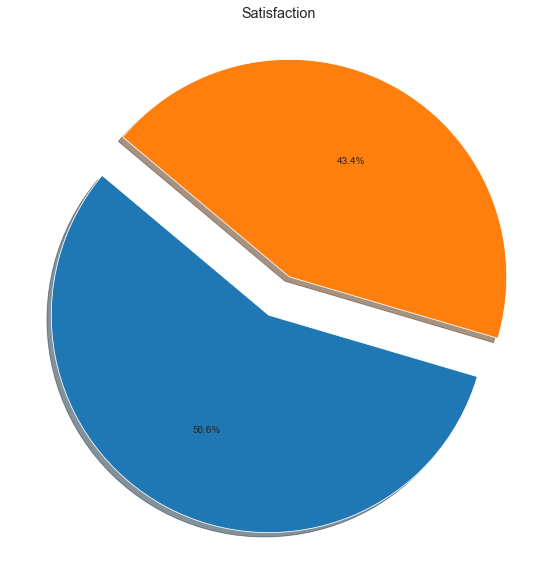

In [75]:
EDA_target(df, target)

The pie chart above represents the two possible prediction oucomes of the machine learning models to be developed. As it can be seen, the dataset consists of an imbalance in terms of its possible outcomes of 'Neutral or Dissatisfied' and 'Satisfied. 
This is a crucial insight as the the imbalance needs to be corrected in order to prevent overfitting of the machine learning model to be developed.

## IDV

### IDV Objective

+--------+----------+
|        |   Gender |
|--------+----------|
| Female |    65703 |
| Male   |    63784 |
+--------+----------+


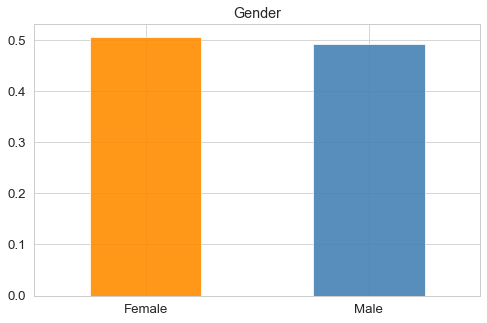

+------------+-----------------+
|            |   Customer Type |
|------------+-----------------|
| Returning  |          105773 |
| First-time |           23714 |
+------------+-----------------+


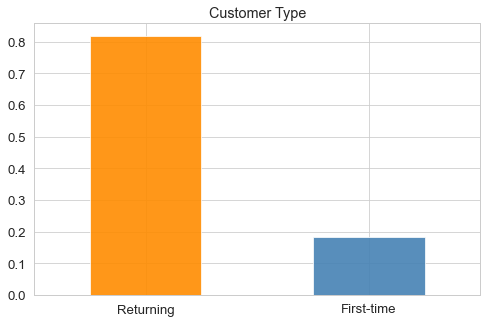

+----------+------------------+
|          |   Type of Travel |
|----------+------------------|
| Business |            89445 |
| Personal |            40042 |
+----------+------------------+


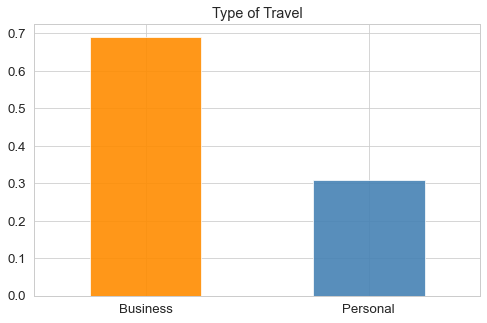

+--------------+---------+
|              |   Class |
|--------------+---------|
| Business     |   61990 |
| Economy      |   58117 |
| Economy Plus |    9380 |
+--------------+---------+


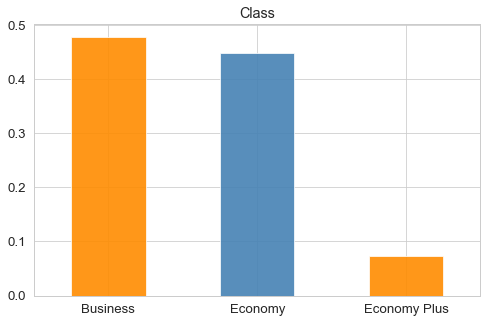

+----+------------------------------------------+
|    |   Departure and Arrival Time Convenience |
|----+------------------------------------------|
|  4 |                                    31786 |
|  5 |                                    27906 |
|  3 |                                    22302 |
|  2 |                                    21478 |
|  1 |                                    19351 |
|  0 |                                     6664 |
+----+------------------------------------------+


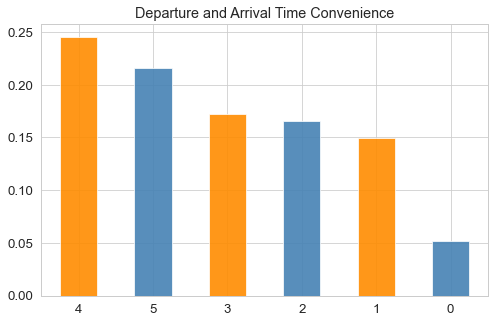

+----+--------------------------+
|    |   Ease of Online Booking |
|----+--------------------------|
|  3 |                    30297 |
|  2 |                    29983 |
|  4 |                    24362 |
|  1 |                    21808 |
|  5 |                    17371 |
|  0 |                     5666 |
+----+--------------------------+


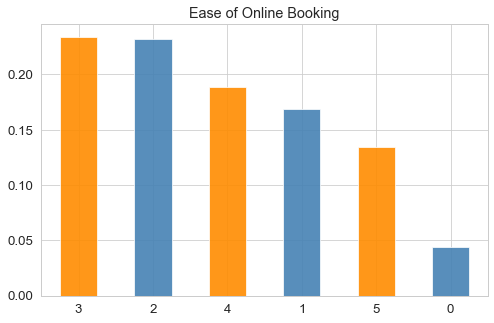

+----+--------------------+
|    |   Check-in Service |
|----+--------------------|
|  4 |              36229 |
|  3 |              35343 |
|  5 |              25800 |
|  1 |              16058 |
|  2 |              16056 |
|  0 |                  1 |
+----+--------------------+


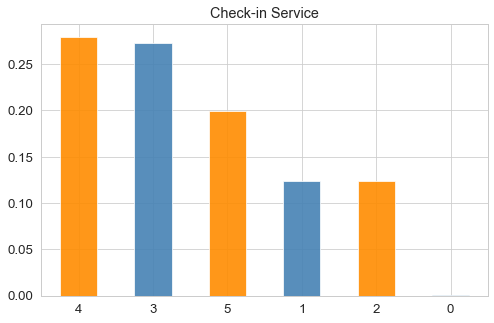

+----+-------------------+
|    |   Online Boarding |
|----+-------------------|
|  4 |             38353 |
|  3 |             27040 |
|  5 |             25941 |
|  2 |             21866 |
|  1 |             13216 |
|  0 |              3071 |
+----+-------------------+


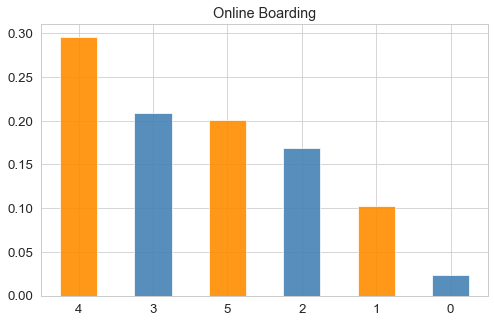

+----+-----------------+
|    |   Gate Location |
|----+-----------------|
|  3 |           35611 |
|  4 |           30376 |
|  2 |           24219 |
|  1 |           21926 |
|  5 |           17354 |
|  0 |               1 |
+----+-----------------+


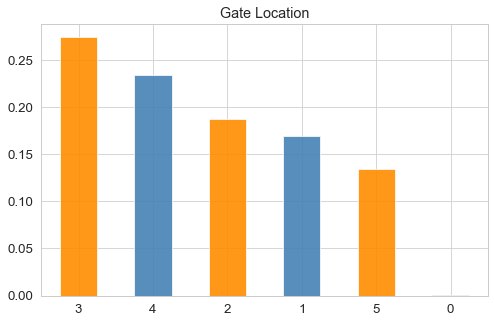

+----+--------------------+
|    |   On-board Service |
|----+--------------------|
|  4 |              38587 |
|  5 |              29407 |
|  3 |              28460 |
|  2 |              18290 |
|  1 |              14738 |
|  0 |                  5 |
+----+--------------------+


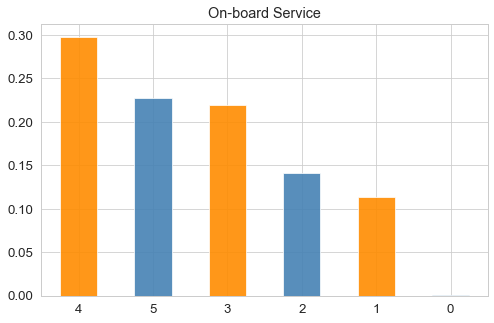

+----+----------------+
|    |   Seat Comfort |
|----+----------------|
|  4 |          39651 |
|  5 |          33056 |
|  3 |          23258 |
|  2 |          18462 |
|  1 |          15059 |
|  0 |              1 |
+----+----------------+


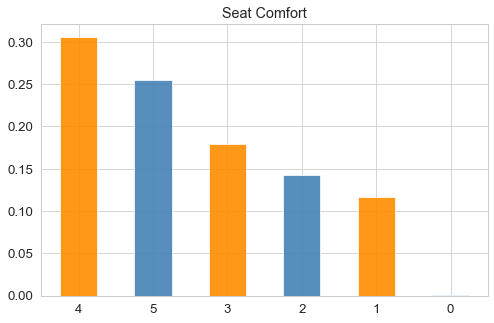

+----+--------------------+
|    |   Leg Room Service |
|----+--------------------|
|  4 |              35779 |
|  5 |              30815 |
|  3 |              24982 |
|  2 |              24469 |
|  1 |              12846 |
|  0 |                596 |
+----+--------------------+


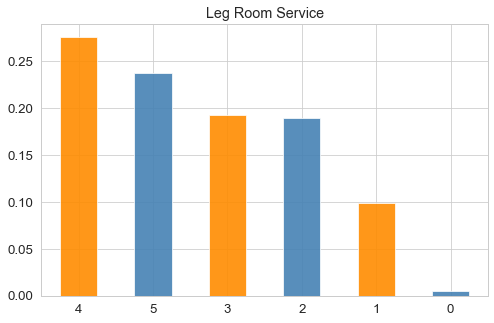

+----+---------------+
|    |   Cleanliness |
|----+---------------|
|  4 |         33871 |
|  3 |         30552 |
|  5 |         28321 |
|  2 |         20049 |
|  1 |         16680 |
|  0 |            14 |
+----+---------------+


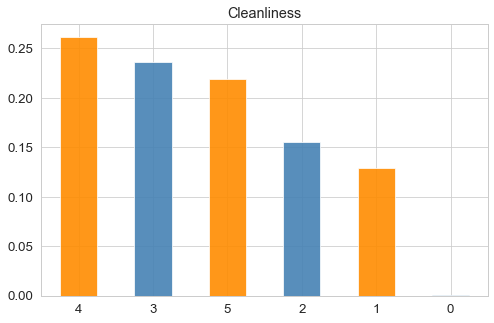

+----+------------------+
|    |   Food and Drink |
|----+------------------|
|  4 |            30477 |
|  5 |            27865 |
|  3 |            27712 |
|  2 |            27293 |
|  1 |            16010 |
|  0 |              130 |
+----+------------------+


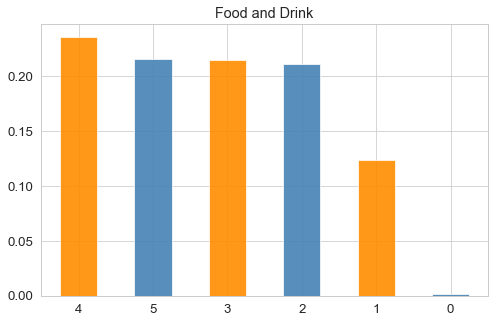

+----+---------------------+
|    |   In-flight Service |
|----+---------------------|
|  4 |               47198 |
|  5 |               33962 |
|  3 |               25232 |
|  2 |               14252 |
|  1 |                8838 |
|  0 |                   5 |
+----+---------------------+


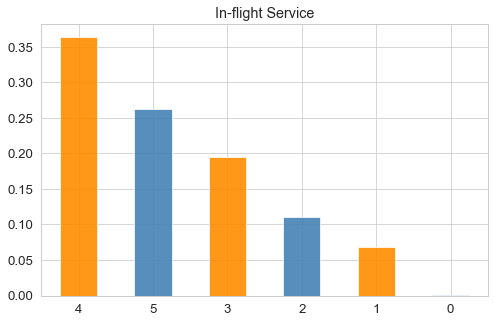

+----+--------------------------+
|    |   In-flight Wifi Service |
|----+--------------------------|
|  2 |                    32236 |
|  3 |                    32087 |
|  4 |                    24702 |
|  1 |                    22250 |
|  5 |                    14304 |
|  0 |                     3908 |
+----+--------------------------+


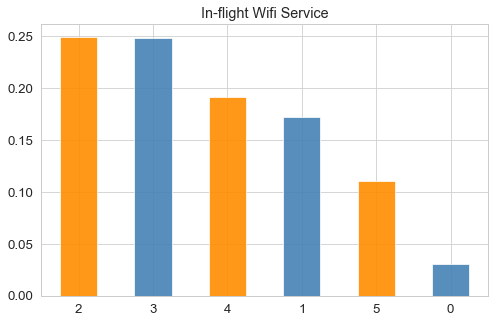

+----+---------------------------+
|    |   In-flight Entertainment |
|----+---------------------------|
|  4 |                     36682 |
|  5 |                     31451 |
|  3 |                     23805 |
|  2 |                     21897 |
|  1 |                     15634 |
|  0 |                        18 |
+----+---------------------------+


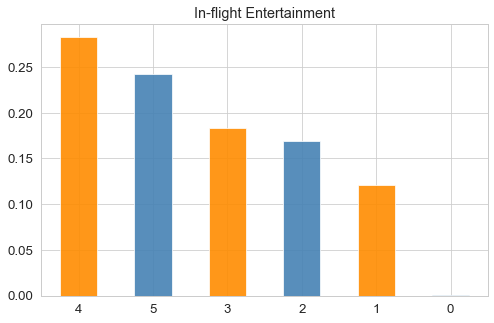

+----+--------------------+
|    |   Baggage Handling |
|----+--------------------|
|  4 |              46631 |
|  5 |              33761 |
|  3 |              25771 |
|  2 |              14316 |
|  1 |               9008 |
+----+--------------------+


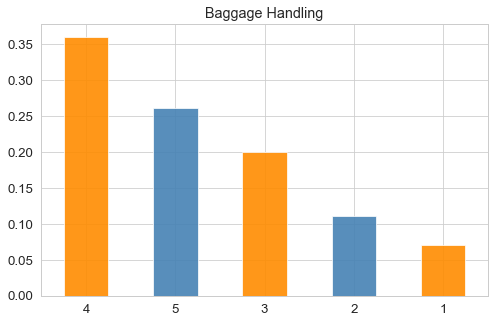

In [76]:
obj_EDA(df, Objcols)

### IDV Objective With DV

In [77]:
EDA_obj(df, Objcols, target)

Variable Name:  Gender


Variable Name:  Customer Type


Variable Name:  Type of Travel


Variable Name:  Class


Variable Name:  Departure and Arrival Time Convenience


Variable Name:  Ease of Online Booking


Variable Name:  Check-in Service


Variable Name:  Online Boarding


Variable Name:  Gate Location


Variable Name:  On-board Service


Variable Name:  Seat Comfort


Variable Name:  Leg Room Service


Variable Name:  Cleanliness


Variable Name:  Food and Drink


Variable Name:  In-flight Service


Variable Name:  In-flight Wifi Service


Variable Name:  In-flight Entertainment


Variable Name:  Baggage Handling


### IDV Numrical

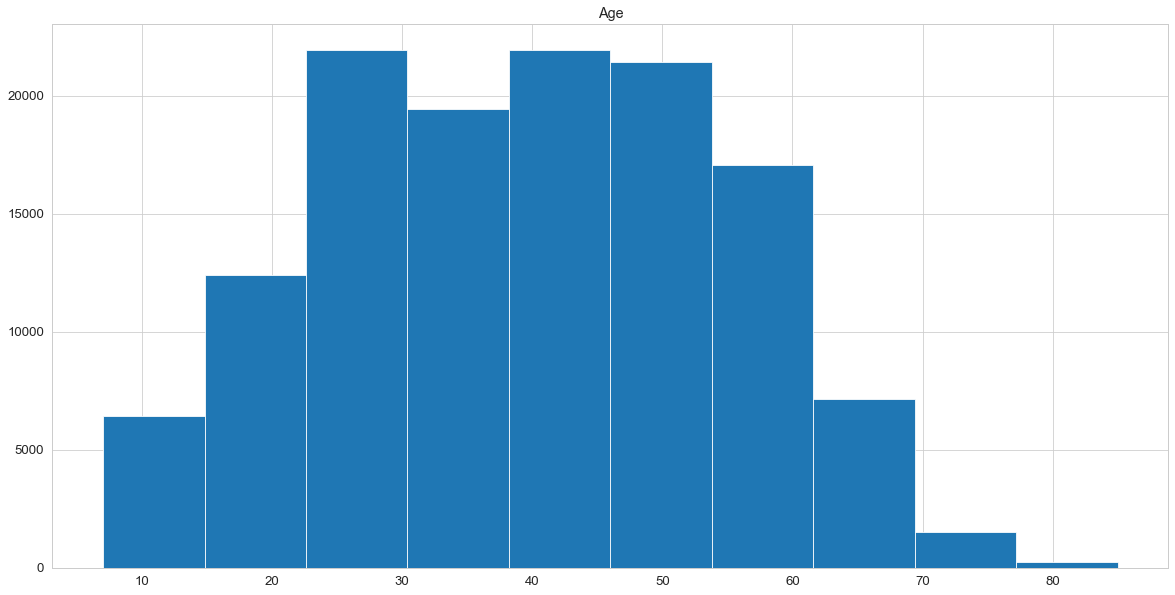

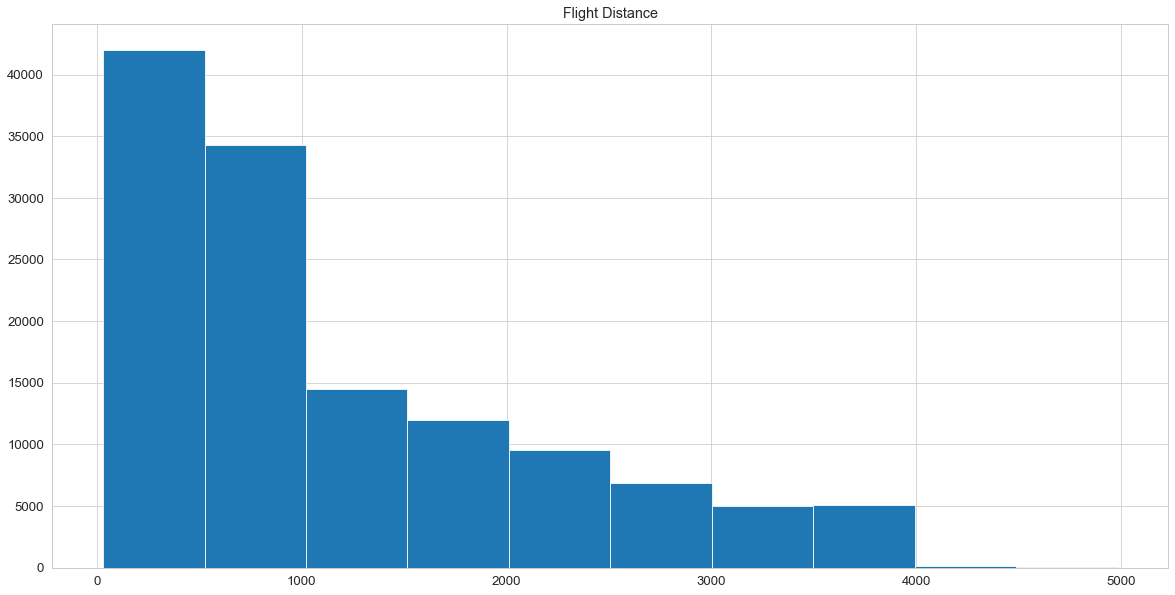

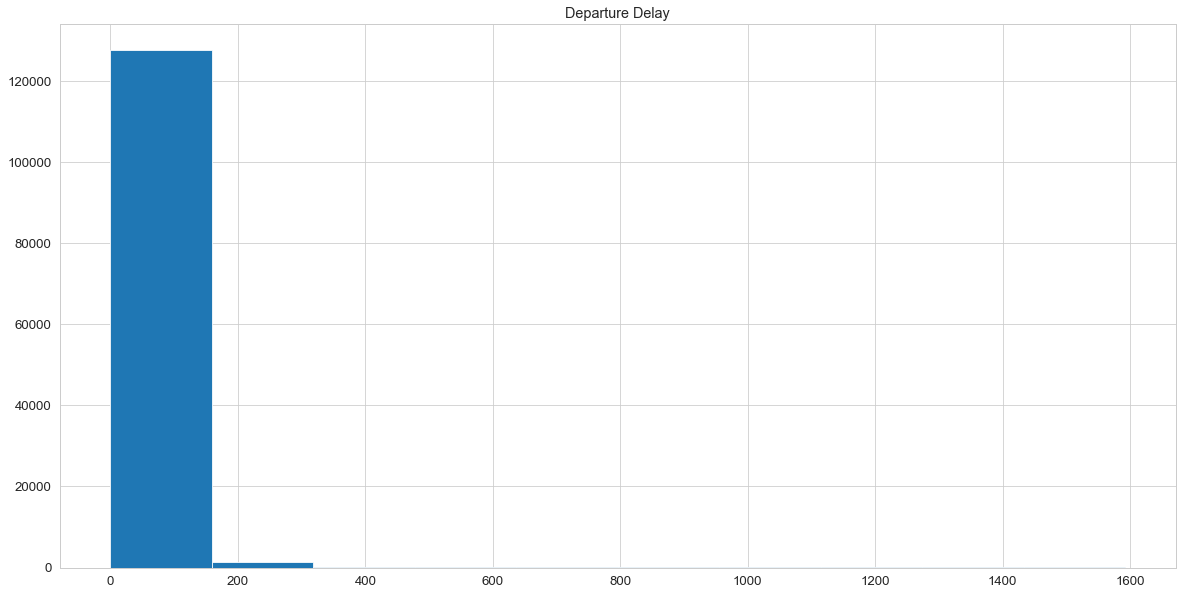

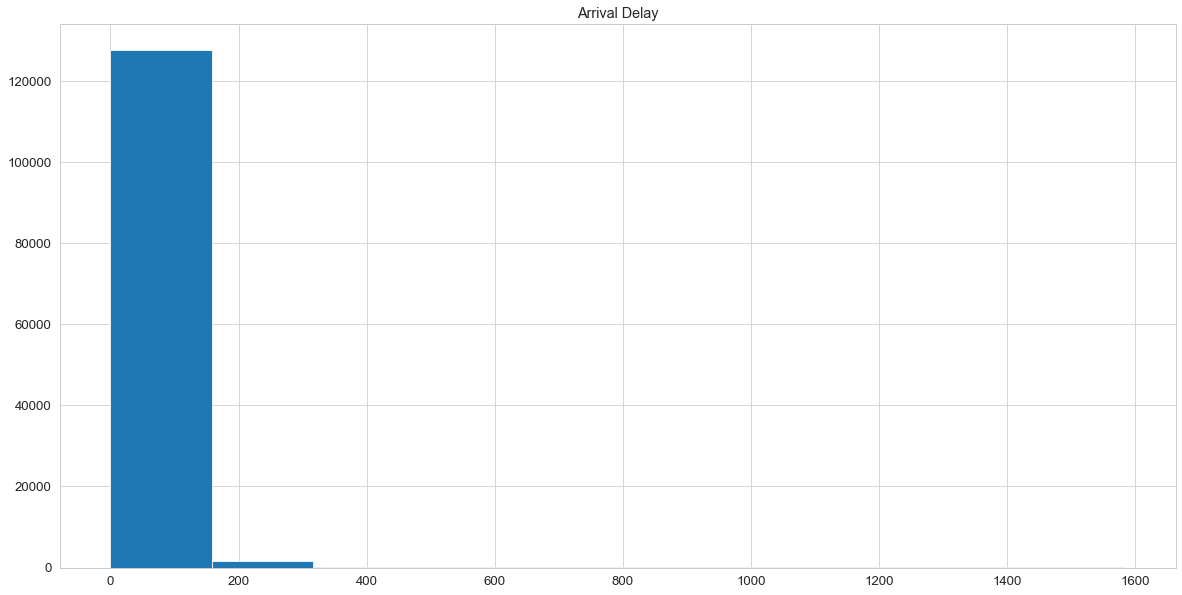

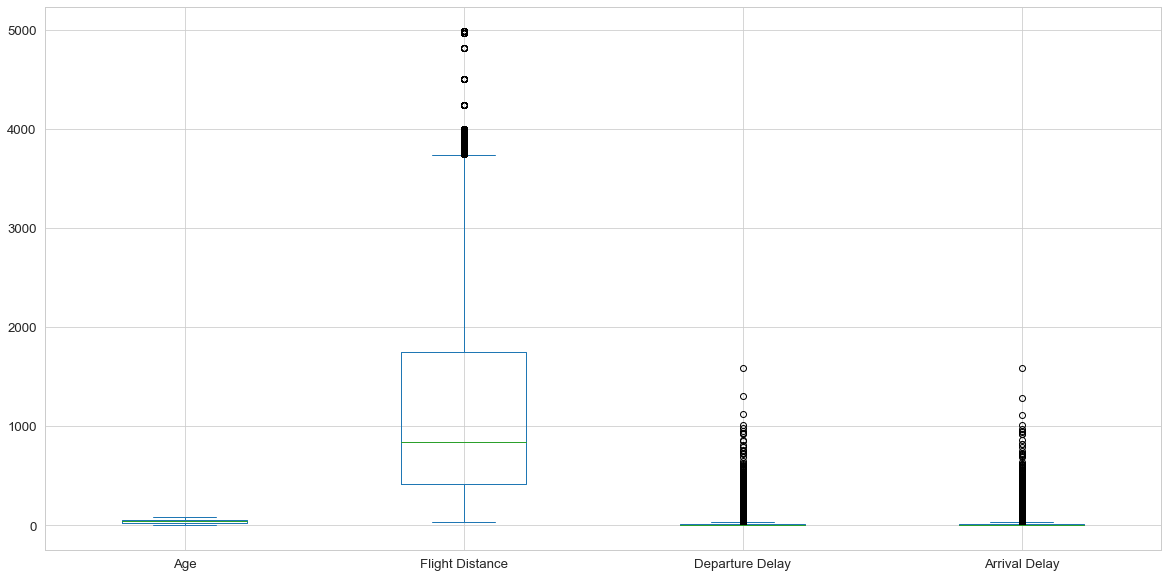

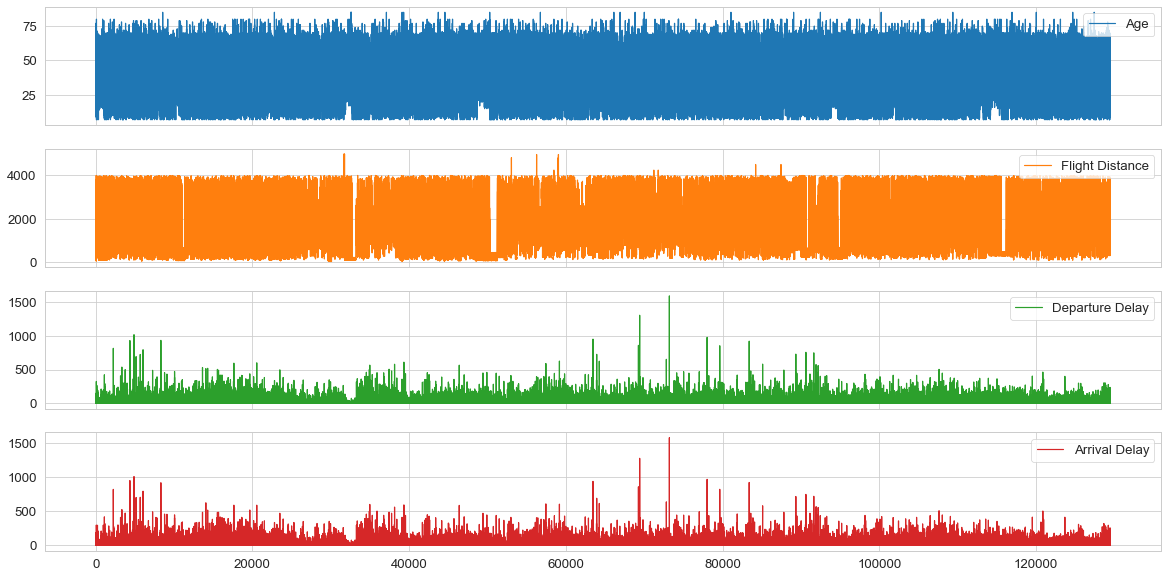

In [78]:
EDA_num(df, NUMcols)

### IDV Numrical With DV

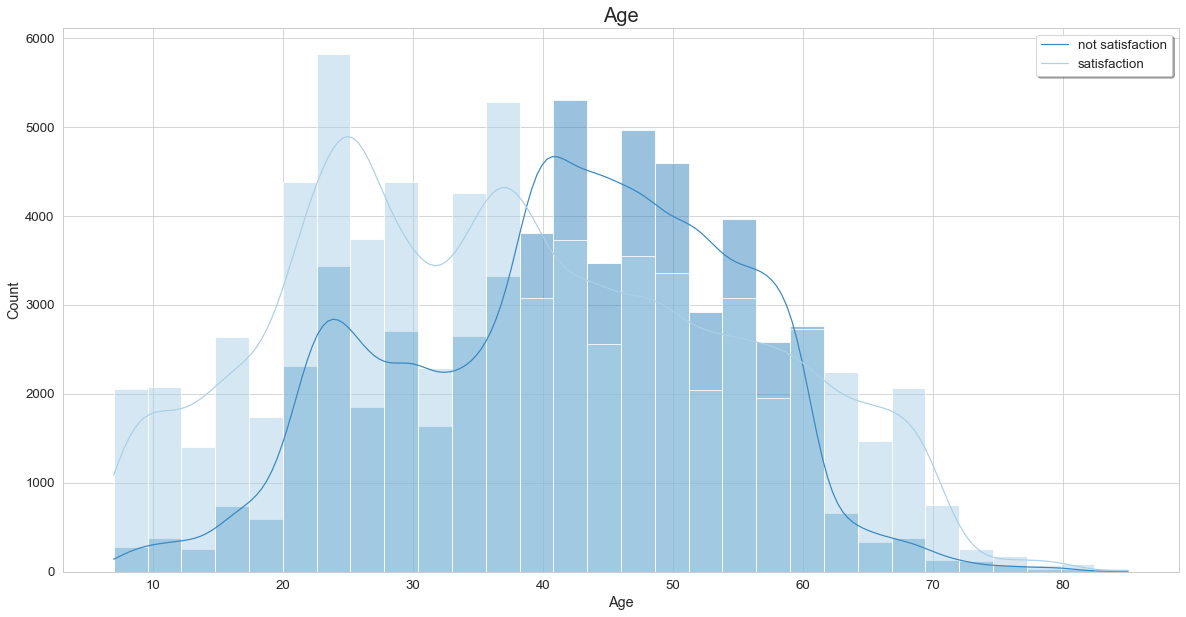

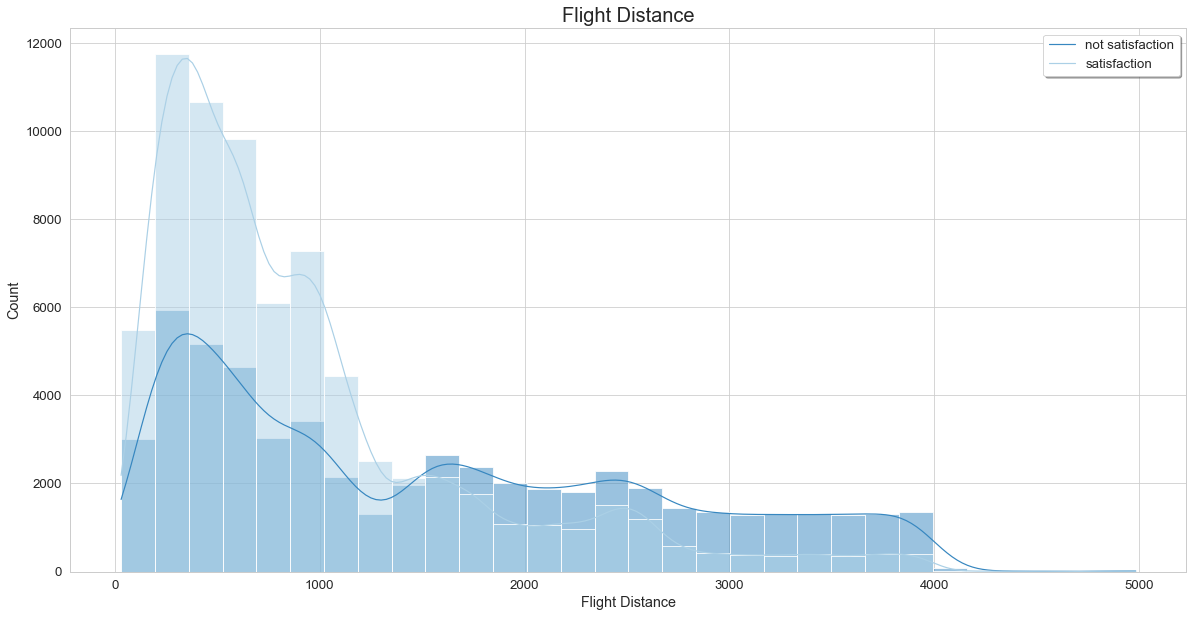

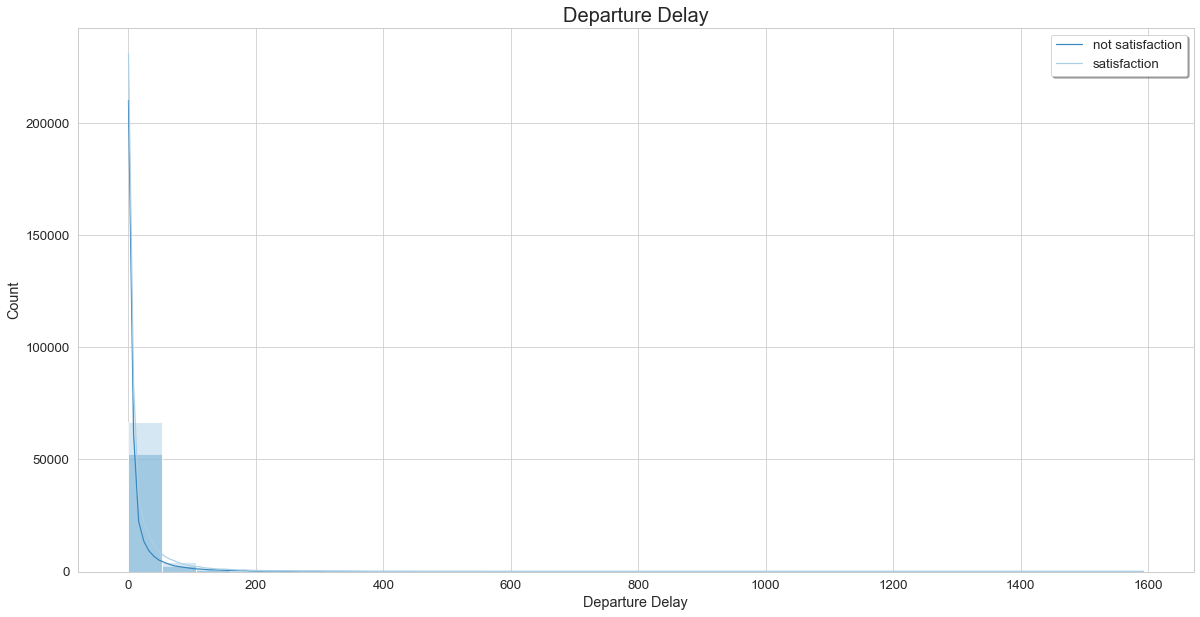

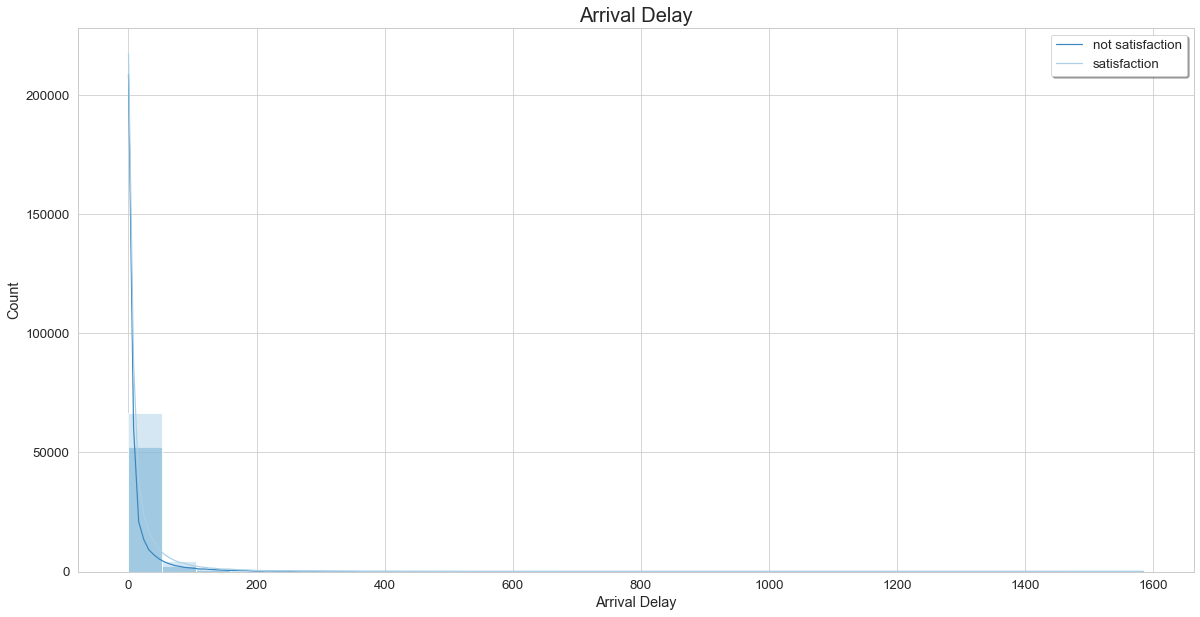

In [79]:
EDA_num_with_DV(df, NUMcols)

# 08. Data Transformation

Machine Learning algorithms perform better when numerical input variables are scaled to a standard range.
Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

In [80]:
# StandardScaler
df = NumStandardScaler(df)


Standardization Applied On: Age

Standardization Applied On: Flight Distance

Standardization Applied On: Departure Delay

Standardization Applied On: Arrival Delay


In [81]:
pd.DataFrame(df.head())

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,0.567,First-time,Business,Business,-0.370,-0.333,-0.262,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,-0.293,Returning,Business,Business,-0.370,0.299,0.622,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,0.104,Returning,Business,Business,-0.338,-0.386,-0.392,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,0.699,Returning,Business,Business,0.717,-0.386,-0.392,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,0.633,Returning,Business,Business,2.285,-0.386,-0.366,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


As noted in the table above, standardisation was performed to the variables "Age," "Flight Distance," "Departure Delay," and "Arrival Delay." each variable's value has previously been standardised.

# 09. Feature Selection

Feature Selection helps in finding the smallest set of features which results in

- Training a machine learning algorithm faster.
- Reducing the complexity of a model and making it easier to interpret.
- Building a sensible model with better prediction power.
- Reducing over-fitting by selecting the right set of features.

## Wrapper "Forward"

In [82]:
df, fs = Feature_selection_forward(df, target)

All the Num Variables: ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Satisfaction']

All the obj Variables: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.2s finished

[2022-06-22 21:43:49] Features: 1/4 -- score: 0.654654470610224[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.8s finished

[2022-06-22 21:44:17] Features: 2/4 -- score: 0.6157797096123474[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.1s finished

[2022-06-22 21:44:38] Features: 3/4 -- score: 0.6199017715153098[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Most Variables Can Effect The Target Variables:
 ('Flight Distance',)

With Highest Score:
 0.654654470610224
All the Num Variables Selected: ['Flight Distance']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished

[2022-06-22 21:44:49] Features: 4/4 -- score: 0.6310129040609098

As we can see In forward selection, it starts with a null model and then starts fitting the model with each individual numerical feature one at a time and selects the feature with the minimum p-value. then it fits a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again it selects the feature with the minimum p-value. then it fits a model with three features by trying combinations of two previously selected features with other remaining features. It repeats this process until it has a set of selected features with a p-value of individual features less than the significance level.

In [83]:
pd.DataFrame(fs)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.655758277826045, 0.6555652089970074, 0.6512211603436625, 0.6541171927792258, 0.6566105131051794]",0.655,"(Flight Distance,)",0.002,0.002,0.001
2,"(1, 2)","[0.6158412974225311, 0.6146828844483058, 0.613958876339415, 0.6142967467902307, 0.620118743061254]",0.616,"(Flight Distance, Departure Delay)",0.003,0.002,0.001
3,"(1, 2, 3)","[0.6187855970653539, 0.6153103581426779, 0.6182546577855005, 0.6226469736461049, 0.6245112709369117]",0.620,"(Flight Distance, Departure Delay, Arrival Delay)",0.004,0.003,0.002
4,"(0, 1, 2, 3)","[0.6384303504199247, 0.6304179940148663, 0.6319142774399074, 0.6275702287865624, 0.6267316696432881]",0.631,"(Age, Flight Distance, Departure Delay, Arrival Delay)",0.005,0.004,0.002


The 'Flight Distance' variable, which has the highest average score and has no other numerical variables, is shown to have the highest average score in the table above that displays the average score for each step in the forward selection.
Therefore, out of all the numerical features, the model will now just choose the 'Flight Distance' variable.

In [84]:
pd.DataFrame(df.head())

,Flight Distance,Gender,Customer Type,Type of Travel,Class,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,-0.370,Male,First-time,Business,Business,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,-0.370,Female,Returning,Business,Business,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,-0.338,Male,Returning,Business,Business,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,0.717,Male,Returning,Business,Business,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,2.285,Female,Returning,Business,Business,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


# 10. Feature Engineering 

This approach is very simple and it involves converting each value in a column to a number. 
As well as, it requires the category column to be of ‘category’ datatype. 

In [85]:
df = df.apply(lambda x: AllObjLabelEncoder(x))


LableEncoding Applied On: Gender

LableEncoding Applied On: Customer Type

LableEncoding Applied On: Type of Travel

LableEncoding Applied On: Class

LableEncoding Applied On: Departure and Arrival Time Convenience

LableEncoding Applied On: Ease of Online Booking

LableEncoding Applied On: Check-in Service

LableEncoding Applied On: Online Boarding

LableEncoding Applied On: Gate Location

LableEncoding Applied On: On-board Service

LableEncoding Applied On: Seat Comfort

LableEncoding Applied On: Leg Room Service

LableEncoding Applied On: Cleanliness

LableEncoding Applied On: Food and Drink

LableEncoding Applied On: In-flight Service

LableEncoding Applied On: In-flight Wifi Service

LableEncoding Applied On: In-flight Entertainment

LableEncoding Applied On: Baggage Handling

LableEncoding Applied On: Satisfaction


In [86]:
pd.DataFrame(df.head())

,Flight Distance,Gender,Customer Type,Type of Travel,Class,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,-0.370,1,0,0,0,3,3,4,3,3,3,5,2,5,5,5,3,5,4,0
1,-0.370,0,1,0,0,2,2,3,5,2,5,4,5,5,3,5,2,5,4,1
2,-0.338,1,1,0,0,4,4,4,5,4,3,5,3,5,5,3,4,3,2,1
3,0.717,1,1,0,0,2,2,3,4,2,5,5,5,4,4,5,2,5,4,1
4,2.285,0,1,0,0,3,3,3,5,3,3,4,4,5,4,3,3,3,2,1


# 11. Statistics 

## Correlation between IDV and DV

In [87]:
pd.DataFrame(df.corr()[target].sort_values(ascending = False).reset_index())

,index,Satisfaction
0,Satisfaction,1.000
1,Online Boarding,0.502
2,In-flight Entertainment,0.398
3,Seat Comfort,0.349
4,On-board Service,0.322
5,Leg Room Service,0.313
6,Cleanliness,0.307
7,Flight Distance,0.298
8,In-flight Wifi Service,0.283
9,Baggage Handling,0.249


## Correlation between all the Variables

In [88]:
pd.DataFrame(df.corr())

,Flight Distance,Gender,Customer Type,Type of Travel,Class,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
Flight Distance,1.000,0.004,0.226,-0.267,-0.427,-0.019,0.065,0.074,0.215,0.005,0.111,0.158,0.135,0.096,0.057,0.059,0.007,0.131,0.065,0.298
Gender,0.004,1.000,0.031,0.009,-0.012,0.009,0.006,0.008,-0.045,-0.001,0.006,-0.031,0.031,0.003,0.002,0.038,0.006,0.004,0.036,0.011
Customer Type,0.226,0.031,1.000,0.308,-0.043,0.207,0.018,0.031,0.189,-0.005,0.054,0.156,0.047,0.081,0.057,-0.024,0.006,0.106,-0.025,0.186
Type of Travel,-0.267,0.009,0.308,1.000,0.487,0.257,-0.134,0.017,-0.224,-0.030,-0.060,-0.127,-0.140,-0.084,-0.069,-0.023,-0.106,-0.153,-0.033,-0.450
Class,-0.427,-0.012,-0.043,0.487,1.000,0.087,-0.095,-0.157,-0.298,-0.006,-0.211,-0.212,-0.199,-0.130,-0.081,-0.159,-0.025,-0.183,-0.167,-0.448
Departure and Arrival Time Convenience,-0.019,0.009,0.207,0.257,0.087,1.000,0.438,0.091,0.072,0.447,0.067,0.009,0.011,0.010,0.001,0.072,0.345,-0.008,0.071,-0.054
Ease of Online Booking,0.065,0.006,0.018,-0.134,-0.095,0.438,1.000,0.009,0.405,0.460,0.039,0.029,0.109,0.015,0.031,0.035,0.715,0.047,0.039,0.169
Check-in Service,0.074,0.008,0.031,0.017,-0.157,0.091,0.009,1.000,0.204,-0.039,0.245,0.190,0.153,0.177,0.085,0.238,0.044,0.120,0.235,0.237
Online Boarding,0.215,-0.045,0.189,-0.224,-0.298,0.072,0.405,0.204,1.000,0.003,0.154,0.419,0.123,0.329,0.234,0.074,0.457,0.284,0.084,0.502
Gate Location,0.005,-0.001,-0.005,-0.030,-0.006,0.447,0.460,-0.039,0.003,1.000,-0.029,0.002,-0.005,-0.006,-0.003,0.000,0.339,0.003,0.001,-0.003


In [89]:
df.corr().style.background_gradient(cmap="Blues") # YlOrBr Greys GnBu

,Flight Distance,Gender,Customer Type,Type of Travel,Class,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
Flight Distance,1.000000,0.003836,0.226134,-0.267064,-0.427144,-0.018901,0.064959,0.073635,0.215082,0.005378,0.111224,0.157825,0.134548,0.095658,0.057136,0.059182,0.006554,0.130518,0.064810,0.298206
Gender,0.003836,1.000000,0.030803,0.009215,-0.011655,0.008772,0.006129,0.008392,-0.044850,-0.000860,0.006441,-0.030847,0.031031,0.002818,0.001631,0.038176,0.005968,0.003798,0.036414,0.011496
Customer Type,0.226134,0.030803,1.000000,0.308210,-0.042959,0.206916,0.018183,0.031258,0.189329,-0.004647,0.054040,0.156383,0.046885,0.081433,0.057126,-0.023567,0.005884,0.106157,-0.025015,0.185925
Type of Travel,-0.267064,0.009215,0.308210,1.000000,0.486598,0.257208,-0.133891,0.016530,-0.223781,-0.029882,-0.059700,-0.127404,-0.139540,-0.084257,-0.068728,-0.023417,-0.105574,-0.152708,-0.032921,-0.449794
Class,-0.427144,-0.011655,-0.042959,0.486598,1.000000,0.087185,-0.094989,-0.157380,-0.297634,-0.005656,-0.210748,-0.212241,-0.198828,-0.129715,-0.080732,-0.159110,-0.024912,-0.183178,-0.166507,-0.448338
Departure and Arrival Time Convenience,-0.018901,0.008772,0.206916,0.257208,0.087185,1.000000,0.437697,0.091217,0.072175,0.447411,0.067046,0.008707,0.010634,0.010021,0.001057,0.072166,0.344846,-0.008189,0.070646,-0.054457
Ease of Online Booking,0.064959,0.006129,0.018183,-0.133891,-0.094989,0.437697,1.000000,0.008835,0.404944,0.460155,0.039039,0.028602,0.109341,0.015150,0.030638,0.035356,0.714888,0.046669,0.039215,0.168704
Check-in Service,0.073635,0.008392,0.031258,0.016530,-0.157380,0.091217,0.008835,1.000000,0.204215,-0.039294,0.244620,0.189838,0.152715,0.176611,0.085103,0.237737,0.043847,0.119664,0.234732,0.237146
Online Boarding,0.215082,-0.044850,0.189329,-0.223781,-0.297634,0.072175,0.404944,0.204215,1.000000,0.002579,0.154272,0.419169,0.123149,0.329331,0.233524,0.073973,0.457422,0.284008,0.083563,0.501620
Gate Location,0.005378,-0.000860,-0.004647,-0.029882,-0.005656,0.447411,0.460155,-0.039294,0.002579,1.000000,-0.029109,0.002493,-0.005146,-0.006066,-0.002825,0.000337,0.338547,0.002751,0.001097,-0.002923


# 12. Resampling Data

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance the minority class. In this section will develop an intuition for the SMOTE approaches by applying it to an imbalanced binary classification problem.
- Note the model will evaluate using the ROC area under curve (AUC) metric

In [120]:
# Define X, y
X = df.drop(target, axis=1)
y = df[target]

X, y = resampling_by_SMOTE(X, y)


Original dataset shape Counter({0: 73225, 1: 56262})
SMOTE Resample dataset shape Counter({0: 73225, 1: 73225})
SMOTE Mean ROC AUC:  0.9470035236510477

Original dataset shape Counter({0: 73225, 1: 56262})
SMOTE SVM Resample dataset shape Counter({0: 73225, 1: 73225})
SMOTE SVM Mean ROC AUC:  0.9380175228040096

Original dataset shape Counter({0: 73225, 1: 56262})
Standerd SMOTE pipeline Resample dataset shape Counter({0: 73225, 1: 73225})
Standerd SMOTE pipeline Mean ROC AUC:  0.9470331145265916

Original dataset shape Counter({0: 73225, 1: 56262})
K neighbors SMOTE pipeline Resample dataset shape Counter({0: 73225, 1: 73225})
K neighbors SMOTE pipeline Mean ROC AUC:  0.9474018963847757

	The Highest ROC Score is:  0.9474018963847757


As it provides, the K neighbors SMOTE pipeline is showing the highest ROC, so it the SMOTE approach select is K neighbors SMOTE pipeline.

In [93]:
print('\nthe new target size now after resampling is: ', Counter(y))


the new target size now after resampling is:  Counter({0: 73225, 1: 73225})


# 13. Data Splitting 

Based on the dataset size, it will split the dataset into 90% for traning and 10% for testing 

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=42)


print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (131805, 19)
y_train:  (131805,)
X_test:  (14645, 19)
y_test:  (14645,)


# 14. Machine Learning Models 

* In this sectuion going to fit 'Train' 16 machine learning models:
    -        Random Forest Classifier
    -        Gradient Boosting Classifier
    -        Histogram-based Gradient Boosting Classification Tree
    -        AdaBoost Classifier
    -        Extra Trees Classifier
    -        K Neighbors Classifier
    -        Naive Bayes Classifiers
    -        Naive Bayes Classifier for Multivariate Bernoulli
    -        Decision Tree Classifier
    -        Logistic Regression Classifier
    -        Logistic Regression CV Classifier
    -        Stochastic Gradient Descent Classifier
    -        Linear Perceptron Classifier
    -        XGBoost Classifiers
    -        Support Vector Machines Classifiers
    -        Linear Support Vector Classification
    -        Multilayer Perceptron Classifier
* Following that it going to test the models.

* After that it going to evaluate each model using: 
    -   Accuracy Score
    -   Classification Report
    -   Confusion Matrix

## Build the Machine Learning Models on CPU

In [96]:
# Random Forest Classifier
rf_m_cpu = RandomForestClassifier().fit(X_train, y_train)

# Gradient Boosting Classifier
gb_m_cpu = GradientBoostingClassifier().fit(X_train, y_train)

# Histogram-based Gradient Boosting Classification Tree
hgb_m_cpu = HistGradientBoostingClassifier().fit(X_train, y_train)

# AdaBoost Classifier
ad_m_cpu = AdaBoostClassifier().fit(X_train, y_train)

# Extra Trees Classifier
et_m_cpu = ExtraTreesClassifier().fit(X_train, y_train)

# K Neighbors Classifier
knn_m_cpu = KNeighborsClassifier().fit(X_train, y_train)

# Naive Bayes Classifiers
nb_m_cpu = GaussianNB().fit(X_train, y_train)

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_cpu = BernoulliNB().fit(X_train, y_train)

# Decision Tree Classifier
dt_m_cpu = DecisionTreeClassifier().fit(X_train, y_train)

# Logistic Regression Classifier
lg_m_cpu = LogisticRegression().fit(X_train, y_train)

# Logistic Regression CV Classifier
lgcv_m_cpu = LogisticRegressionCV().fit(X_train, y_train)

# Stochastic Gradient Descent Classifier
sgdc_m_cpu = SGDClassifier().fit(X_train, y_train)

# Linear Perceptron Classifier
lpc_m_cpu = Perceptron().fit(X_train, y_train)

# XGBoost Classifiers
xgb_m_cpu = XGBClassifier().fit(X_train, y_train)

# Support Vector Machines Classifiers
svm_m_cpu = SVC().fit(X_train, y_train)

# Linear Support Vector Classification
lsvm_m_cpu = LinearSVC().fit(X_train, y_train)

# Multilayer Perceptron Classifier
mlp_m_cpu = MLPClassifier().fit(X_train, y_train)

## Predict y_test Using CPU

In [97]:
# Random Forest Classifier
rf_m_pred_vaild_cpu = rf_m_cpu.predict(X_test)

# Gradient Boosting Classifier
gb_m_pred_vaild_cpu = gb_m_cpu.predict(X_test)

# Histogram-based Gradient Boosting Classification Tree
hgb_m_pred_vaild_cpu = hgb_m_cpu.predict(X_test)

# AdaBoost Classifier
ad_m_pred_vaild_cpu = ad_m_cpu.predict(X_test)

# Extra Trees Classifier
et_m_pred_vaild_cpu = et_m_cpu.predict(X_test)

# K Neighbors Classifier
knn_m_pred_vaild_cpu = knn_m_cpu.predict(X_test)

# Naive Bayes Classifiers
nb_m_pred_vaild_cpu = nb_m_cpu.predict(X_test)

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_pred_vaild_cpu = bnb_m_cpu.predict(X_test)

# Decision Tree Classifier
dt_m_pred_vaild_cpu = dt_m_cpu.predict(X_test)

# Logistic Regression Classifier
lg_m_pred_vaild_cpu = lg_m_cpu.predict(X_test)

# Logistic Regression CV Classifier
lgcv_m_pred_vaild_cpu =  lgcv_m_cpu.predict(X_test)

# Stochastic Gradient Descent Classifier
sgdc_m_pred_vaild_cpu =  sgdc_m_cpu.predict(X_test)

# Linear Perceptron Classifier
lpc_m_pred_vaild_cpu =  lpc_m_cpu.predict(X_test)

# XGBoost Classifiers
xgb_m_pred_vaild_cpu = xgb_m_cpu.predict(X_test)

# Support Vector Machines Classifiers
svm_m_pred_vaild_cpu = svm_m_cpu.predict(X_test)

# Linear Support Vector Classification
lsvm_m_pred_vaild_cpu = lsvm_m_cpu.predict(X_test)

# Multilayer Perceptron Classifier
mlp_m_pred_vaild_cpu = mlp_m_cpu.predict(X_test)

## Evaluate the Models CPU

### Accuracy Score

In [98]:
# Random Forest Classifier
Valid_accuracy_rf_m_cpu = accuracy_score(y_test, rf_m_pred_vaild_cpu)

# Gradient Boosting Classifier
Valid_accuracy_gb_m_cpu = accuracy_score(y_test, gb_m_pred_vaild_cpu)

# Histogram-based Gradient Boosting Classification Tree
Valid_accuracy_hgb_m_cpu = accuracy_score(y_test, hgb_m_pred_vaild_cpu)

# AdaBoost Classifier
Valid_accuracy_ad_m_cpu = accuracy_score(y_test, ad_m_pred_vaild_cpu)

# Extra Trees Classifier
Valid_accuracy_et_m_cpu = accuracy_score(y_test, et_m_pred_vaild_cpu)

# K Neighbors Classifier
Valid_accuracy_knn_m_cpu = accuracy_score(y_test, knn_m_pred_vaild_cpu)

# Naive Bayes Classifiers
Valid_accuracy_nb_m_cpu = accuracy_score(y_test, nb_m_pred_vaild_cpu)

# Naive Bayes Classifier for Multivariate Bernoulli
Valid_accuracy_bnb_m_cpu = accuracy_score(y_test, bnb_m_pred_vaild_cpu)

# Decision Tree Classifier
Valid_accuracy_dt_m_cpu = accuracy_score(y_test, dt_m_pred_vaild_cpu)

# Logistic Regression Classifier
Valid_accuracy_lg_m_cpu = accuracy_score(y_test, lg_m_pred_vaild_cpu)

# Logistic Regression CV Classifier
Valid_accuracy_lgcv_m_cpu = accuracy_score(y_test, lgcv_m_pred_vaild_cpu)

# Stochastic Gradient Descent Classifier
Valid_accuracy_sgdc_m_cpu = accuracy_score(y_test, sgdc_m_pred_vaild_cpu)

# Linear Perceptron Classifier
Valid_accuracy_lpc_m_cpu = accuracy_score(y_test, lpc_m_pred_vaild_cpu)

# XGBoost Classifiers
Valid_accuracy_xgb_m_cpu = accuracy_score(y_test, xgb_m_pred_vaild_cpu)

# Support Vector Machines Classifiers
Valid_accuracy_svm_m_cpu = accuracy_score(y_test, svm_m_pred_vaild_cpu)

# Linear Support Vector Classification
Valid_accuracy_lsvm_m_cpu = accuracy_score(y_test, lsvm_m_pred_vaild_cpu)
        
# Multilayer Perceptron Classifier
Valid_accuracy_mlp_m_cpu = accuracy_score(y_test, mlp_m_pred_vaild_cpu)

cpu_ml_m_valid_compare = pd.DataFrame({"Standered CPU Models": [
                                                "Random Forest Classifier", 
                                                "Gradient Boosting Classifier",
                                                "Histogram-based Gradient Boosting Classification Tree",
                                                "AdaBoost Classifier",
                                                "Extra Trees Classifier",
                                                "K Neighbors Classifier",
                                                "Naive Bayes Classifiers",
                                                "Naive Bayes Classifier for Multivariate Bernoulli",
                                                "Decision Tree Classifier",
                                                "Logistic Regression Classifier",
                                                "Logistic Regression CV Classifier",
                                                "Stochastic Gradient Descent Classifier",
                                                "Linear Perceptron Classifier",
                                                "XGBoost Classifiers",
                                                "Support Vector Machines Classifiers",
                                                "Linear Support Vector Classification",
                                                "Multilayer Perceptron Classifier"
                                                ],

                                "Accuracy": [
                                                Valid_accuracy_rf_m_cpu, 
                                                Valid_accuracy_gb_m_cpu,
                                                Valid_accuracy_hgb_m_cpu,
                                                Valid_accuracy_ad_m_cpu,
                                                Valid_accuracy_et_m_cpu,
                                                Valid_accuracy_knn_m_cpu,
                                                Valid_accuracy_nb_m_cpu,
                                                Valid_accuracy_bnb_m_cpu,
                                                Valid_accuracy_dt_m_cpu,
                                                Valid_accuracy_lg_m_cpu,
                                                Valid_accuracy_lgcv_m_cpu,
                                                Valid_accuracy_sgdc_m_cpu,
                                                Valid_accuracy_lpc_m_cpu,
                                                Valid_accuracy_xgb_m_cpu,
                                                Valid_accuracy_svm_m_cpu,
                                                Valid_accuracy_lsvm_m_cpu,
                                                Valid_accuracy_mlp_m_cpu
                                                ],
                                        })  
                                              
print(tabulate(cpu_ml_m_valid_compare.sort_values(by="Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))
fig = px.bar(cpu_ml_m_valid_compare.sort_values(by="Accuracy", ascending=True), x = "Accuracy", y = "Standered CPU Models", title = "Accuracy Validation for Machines Learning Model on CPU")
fig.show()

+----+-------------------------------------------------------+------------+
|    | Standered CPU Models                                  |   Accuracy |
|----+-------------------------------------------------------+------------|
|  0 | Random Forest Classifier                              |   0.964152 |
|  4 | Extra Trees Classifier                                |   0.964152 |
| 13 | XGBoost Classifiers                                   |   0.958757 |
|  2 | Histogram-based Gradient Boosting Classification Tree |   0.958416 |
| 16 | Multilayer Perceptron Classifier                      |   0.954319 |
|  8 | Decision Tree Classifier                              |   0.946466 |
| 14 | Support Vector Machines Classifiers                   |   0.94394  |
|  1 | Gradient Boosting Classifier                          |   0.941209 |
|  5 | K Neighbors Classifier                                |   0.938204 |
|  3 | AdaBoost Classifier                                   |   0.923933 |
| 15 | Linea

### Classification Report and Confusion Matrix

#### Random Forest Classifier

Model Random Forest Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.954     0.974     0.964      7247
           1      0.974     0.954     0.964      7398

    accuracy                          0.964     14645
   macro avg      0.964     0.964     0.964     14645
weighted avg      0.964     0.964     0.964     14645



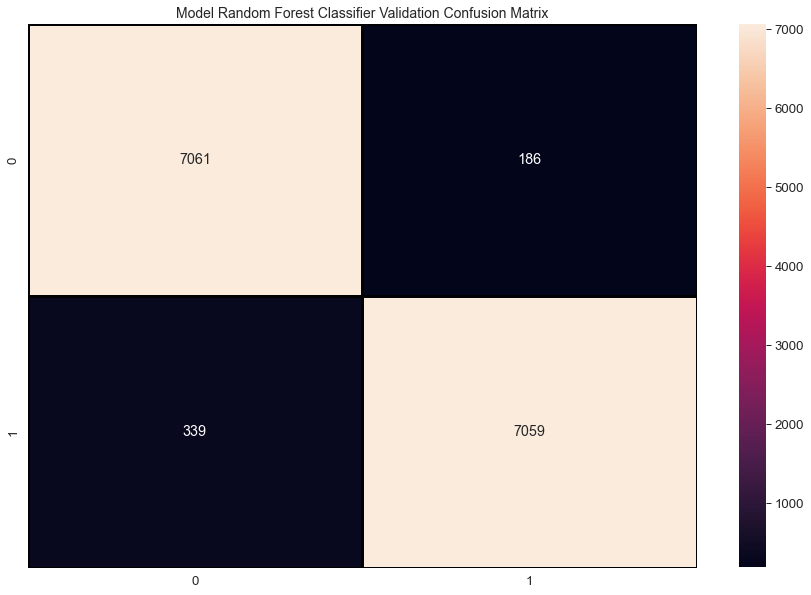

In [99]:
print('Model Random Forest Classifier Validation Classification Report:\n ', classification_report(y_test, rf_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rf_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Random Forest Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Gradient Boosting Classifier

Model Gradient Boosting Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.936     0.946     0.941      7247
           1      0.946     0.937     0.942      7398

    accuracy                          0.941     14645
   macro avg      0.941     0.941     0.941     14645
weighted avg      0.941     0.941     0.941     14645



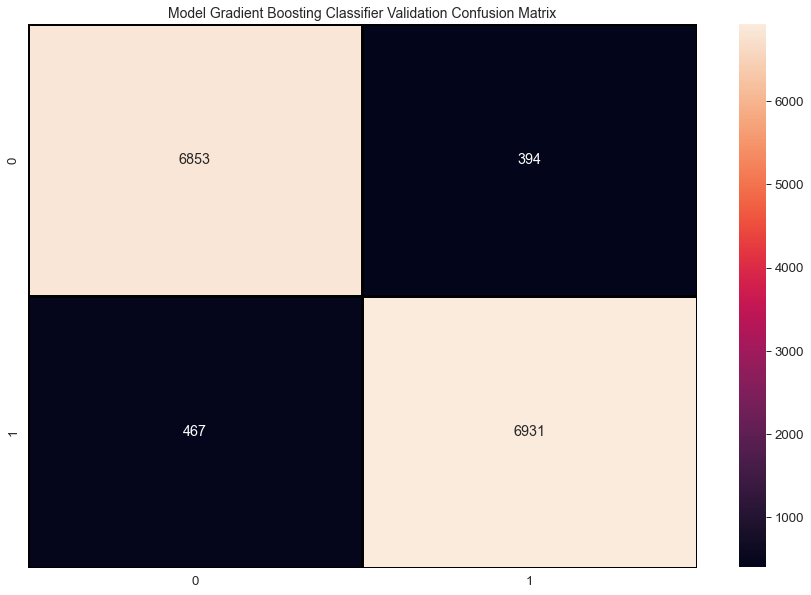

In [100]:
print('Model Gradient Boosting Classifier Validation Classification Report:\n ', classification_report(y_test, gb_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, gb_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Gradient Boosting Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Histogram-based Gradient Boosting Classification Tree

Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:
                precision    recall  f1-score   support

           0      0.943     0.974     0.959      7247
           1      0.974     0.943     0.958      7398

    accuracy                          0.958     14645
   macro avg      0.959     0.959     0.958     14645
weighted avg      0.959     0.958     0.958     14645



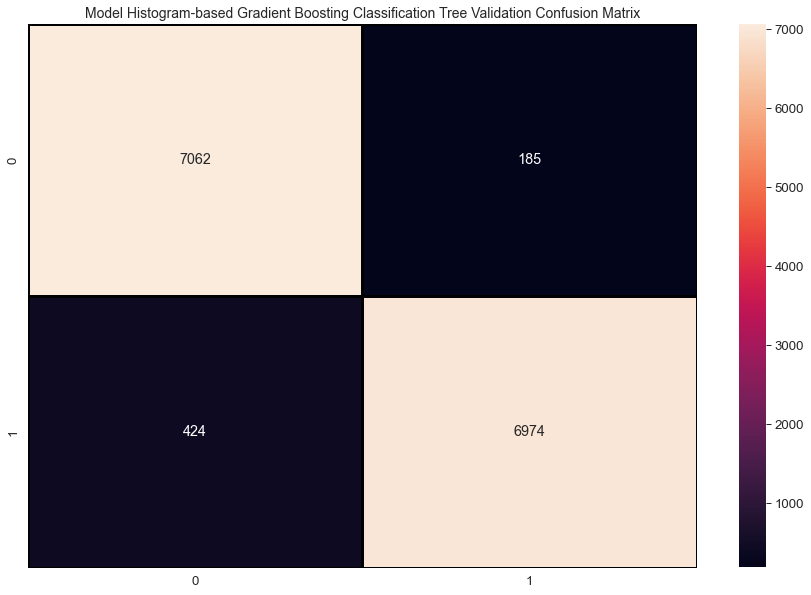

In [101]:
print('Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:\n ', classification_report(y_test, hgb_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, hgb_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Histogram-based Gradient Boosting Classification Tree Validation Confusion Matrix",fontsize=14)
plt.show()

#### AdaBoost Classifier

Model AdaBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.921     0.926     0.923      7247
           1      0.927     0.922     0.925      7398

    accuracy                          0.924     14645
   macro avg      0.924     0.924     0.924     14645
weighted avg      0.924     0.924     0.924     14645



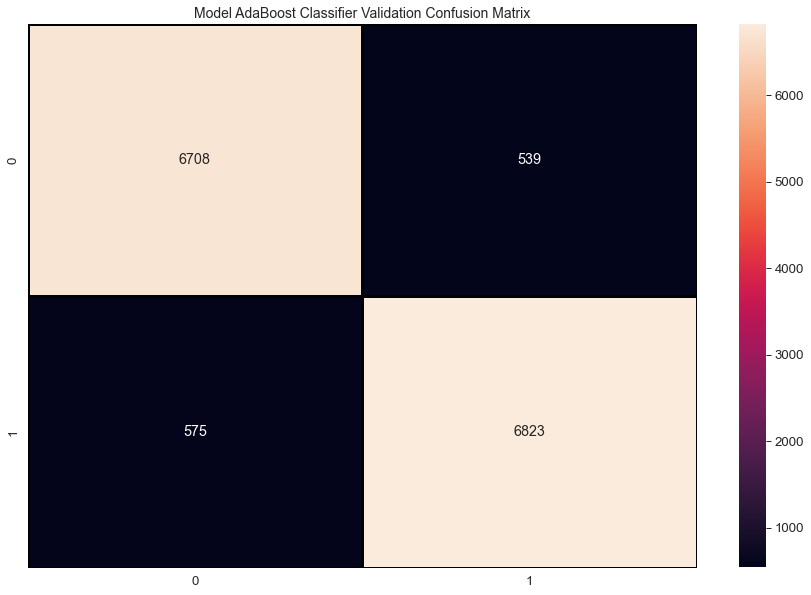

In [102]:
print('Model AdaBoost Classifier Validation Classification Report:\n ', classification_report(y_test, ad_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, ad_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model AdaBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Extra Trees Classifier

Model Extra Trees Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.955     0.973     0.964      7247
           1      0.973     0.956     0.964      7398

    accuracy                          0.964     14645
   macro avg      0.964     0.964     0.964     14645
weighted avg      0.964     0.964     0.964     14645



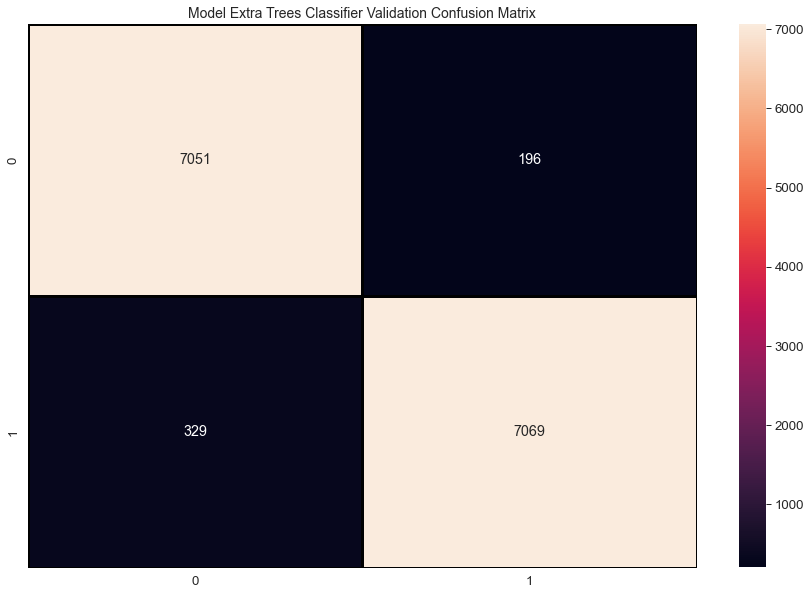

In [103]:
print('Model Extra Trees Classifier Validation Classification Report:\n ', classification_report(y_test, et_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, et_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Extra Trees Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### K Neighbors Classifier

Model K Neighbors Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.929     0.947     0.938      7247
           1      0.947     0.929     0.938      7398

    accuracy                          0.938     14645
   macro avg      0.938     0.938     0.938     14645
weighted avg      0.938     0.938     0.938     14645



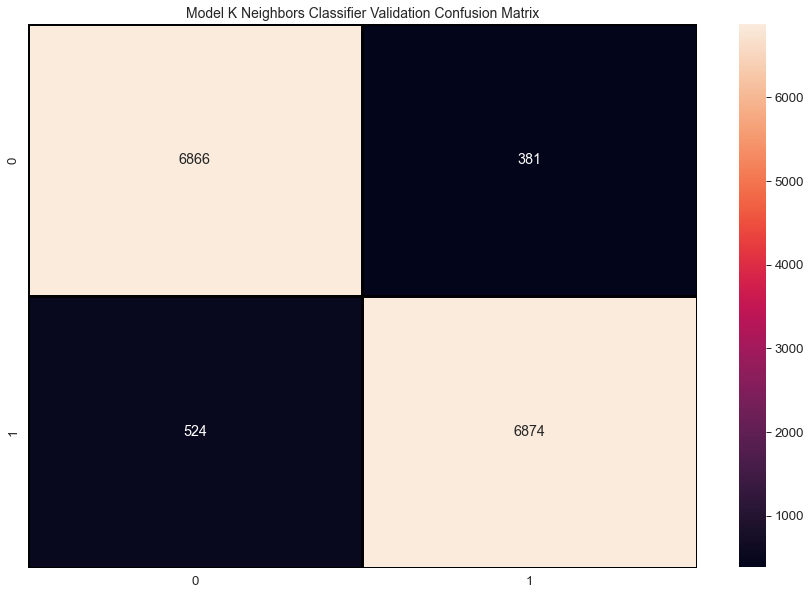

In [104]:
print('Model K Neighbors Classifier Validation Classification Report:\n ', classification_report(y_test, knn_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, knn_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model K Neighbors Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier 

Model Naive Bayes Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.831     0.889     0.859      7247
           1      0.884     0.823     0.852      7398

    accuracy                          0.856     14645
   macro avg      0.857     0.856     0.856     14645
weighted avg      0.858     0.856     0.856     14645



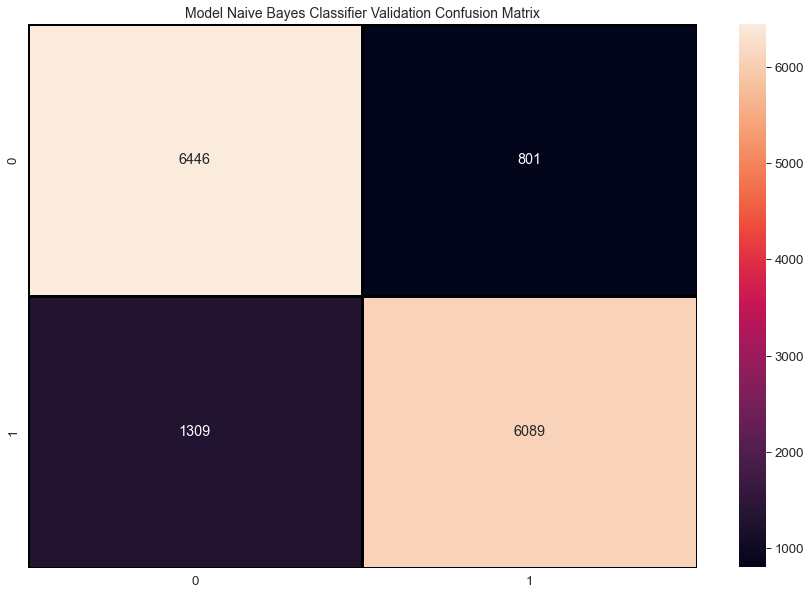

In [105]:
print('Model Naive Bayes Classifier Validation Classification Report:\n ', classification_report(y_test, nb_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, nb_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Naive Bayes Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier for Multivariate Bernoulli

Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:
                precision    recall  f1-score   support

           0      0.785     0.751     0.768      7247
           1      0.766     0.798     0.782      7398

    accuracy                          0.775     14645
   macro avg      0.775     0.775     0.775     14645
weighted avg      0.775     0.775     0.775     14645



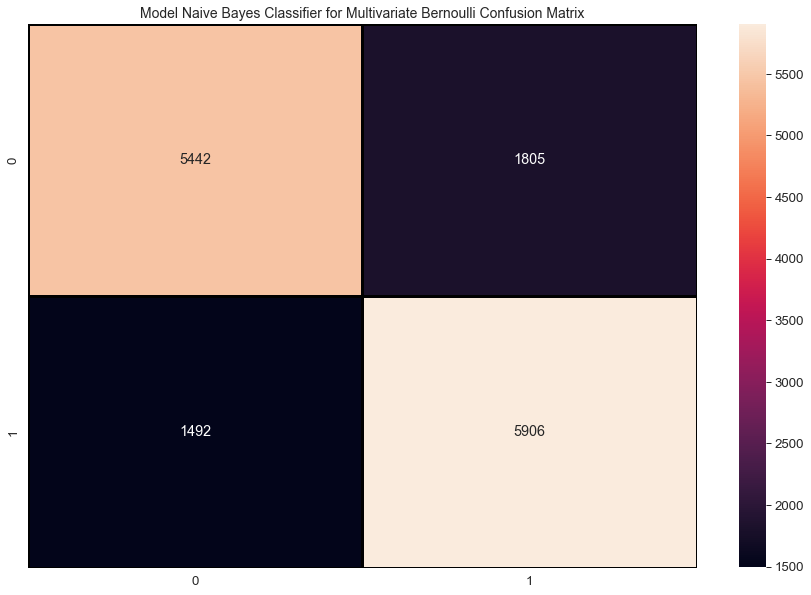

In [106]:
print('Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:\n ', classification_report(y_test, bnb_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, bnb_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Naive Bayes Classifier for Multivariate Bernoulli Confusion Matrix",fontsize=14)
plt.show()

#### Decision Tree Classifier

Model Decision Tree Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.947     0.945     0.946      7247
           1      0.946     0.948     0.947      7398

    accuracy                          0.946     14645
   macro avg      0.946     0.946     0.946     14645
weighted avg      0.946     0.946     0.946     14645



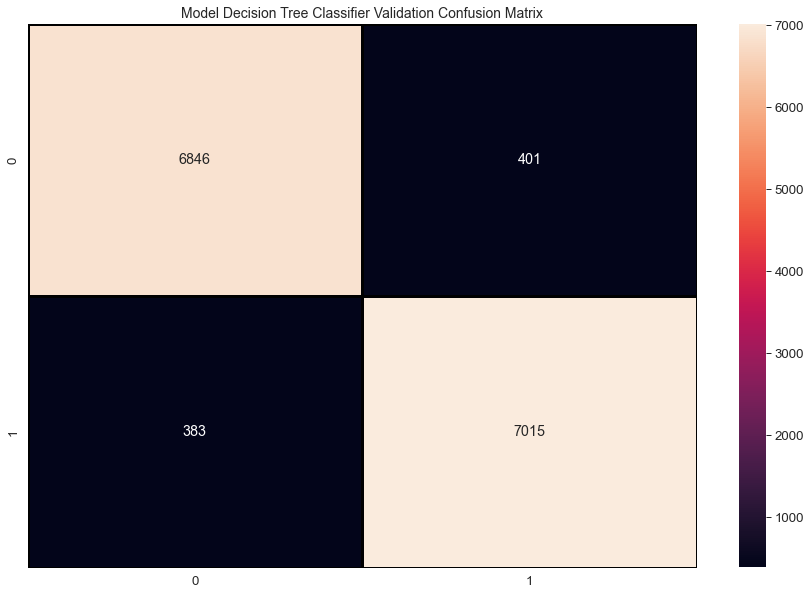

In [107]:
print('Model Decision Tree Classifier Validation Classification Report:\n ', classification_report(y_test, dt_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, dt_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Decision Tree Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression Classifier

Model Logistic Regression Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.855     0.869     0.862      7247
           1      0.869     0.856     0.862      7398

    accuracy                          0.862     14645
   macro avg      0.862     0.862     0.862     14645
weighted avg      0.862     0.862     0.862     14645



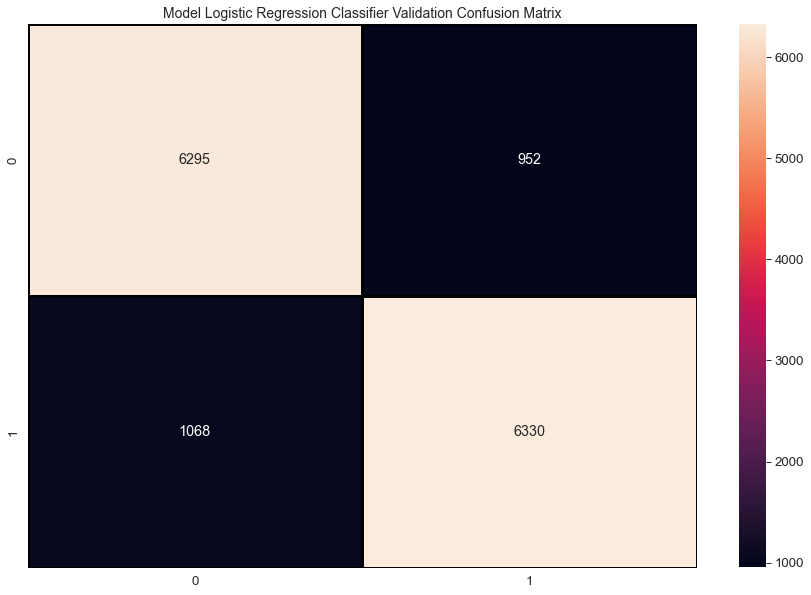

In [108]:
print('Model Logistic Regression Classifier Validation Classification Report:\n ', classification_report(y_test, lg_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lg_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Logistic Regression Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression CV Classifier

Model Logistic Regression CV Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.855     0.869     0.862      7247
           1      0.870     0.856     0.863      7398

    accuracy                          0.862     14645
   macro avg      0.863     0.863     0.862     14645
weighted avg      0.863     0.862     0.862     14645



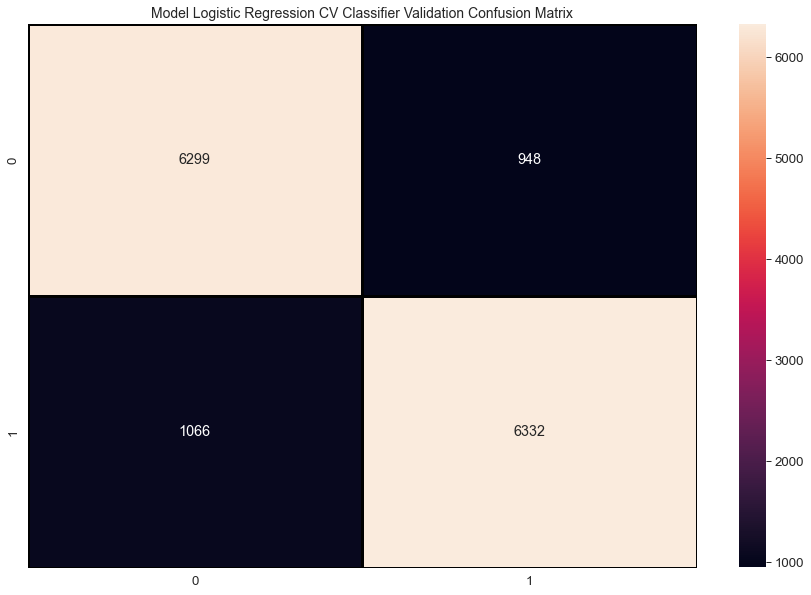

In [109]:
print('Model Logistic Regression CV Classifier Validation Classification Report:\n ', classification_report(y_test, lgcv_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lgcv_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Logistic Regression CV Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Stochastic Gradient Descent Classifier

Model Stochastic Gradient Descent Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.874     0.815     0.843      7247
           1      0.830     0.885     0.856      7398

    accuracy                          0.850     14645
   macro avg      0.852     0.850     0.850     14645
weighted avg      0.852     0.850     0.850     14645



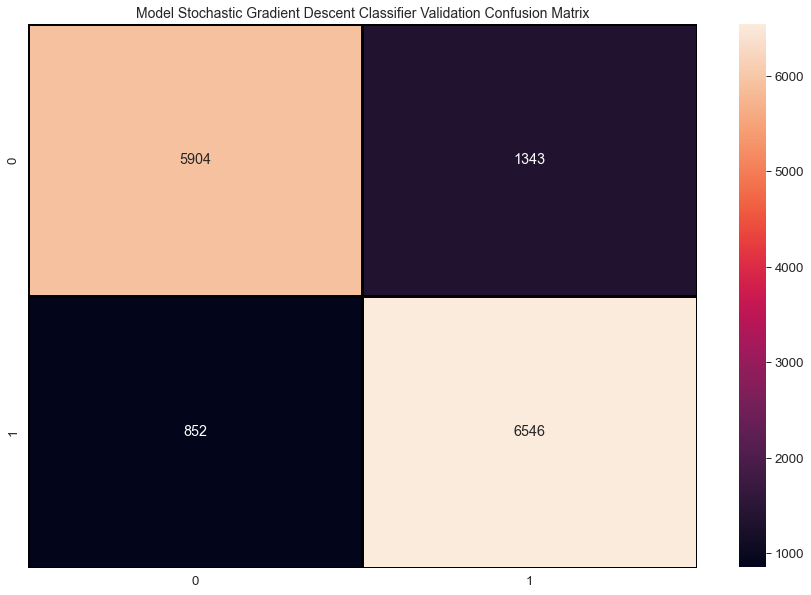

In [110]:
print('Model Stochastic Gradient Descent Classifier Validation Classification Report:\n ', classification_report(y_test, sgdc_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, sgdc_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Stochastic Gradient Descent Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Perceptron Classifier

Model Linear Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.874     0.644     0.742      7247
           1      0.723     0.909     0.805      7398

    accuracy                          0.778     14645
   macro avg      0.799     0.777     0.774     14645
weighted avg      0.798     0.778     0.774     14645



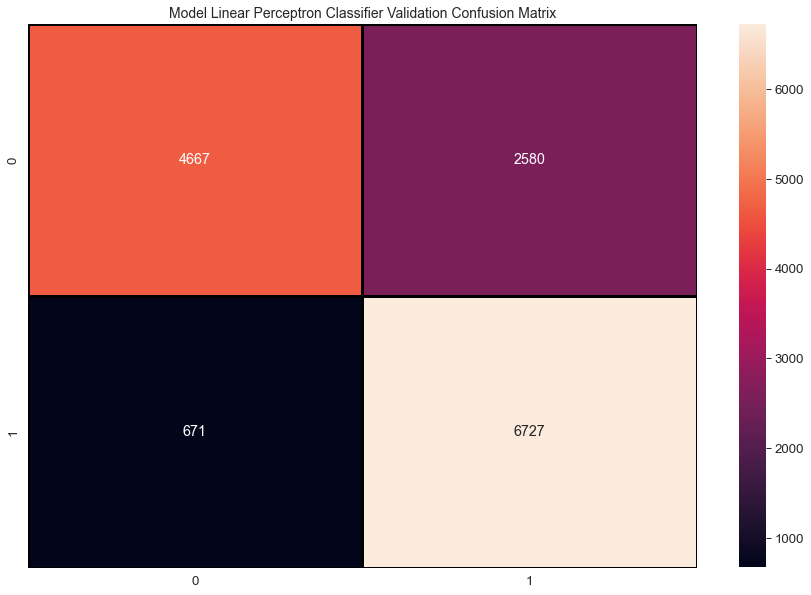

In [111]:
print('Model Linear Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, lpc_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lpc_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Linear Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### XGBoost Classifier

Model XGBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.946     0.972     0.959      7247
           1      0.972     0.945     0.959      7398

    accuracy                          0.959     14645
   macro avg      0.959     0.959     0.959     14645
weighted avg      0.959     0.959     0.959     14645



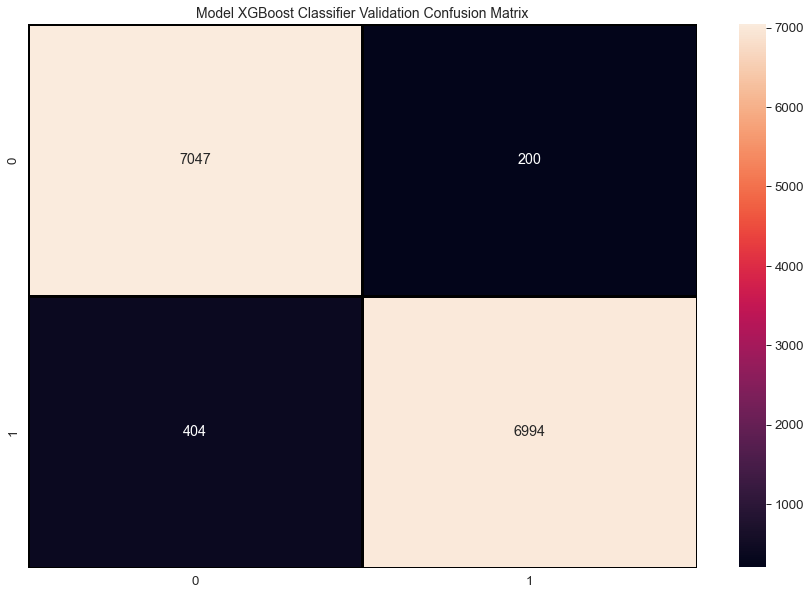

In [112]:
print('Model XGBoost Classifier Validation Classification Report:\n ', classification_report(y_test, xgb_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, xgb_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model XGBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Support Vector Machines Classifier

Model Support Vector Machines Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.938     0.950     0.944      7247
           1      0.950     0.938     0.944      7398

    accuracy                          0.944     14645
   macro avg      0.944     0.944     0.944     14645
weighted avg      0.944     0.944     0.944     14645



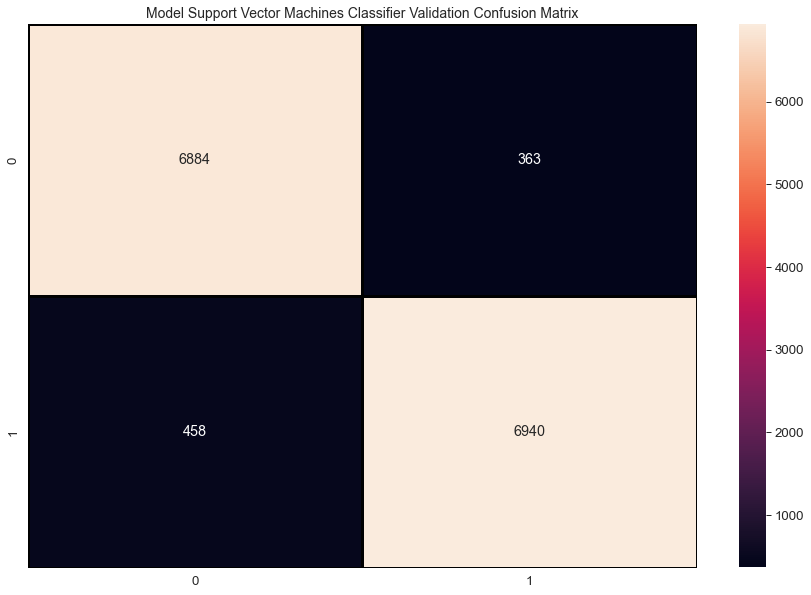

In [113]:
print('Model Support Vector Machines Classifier Validation Classification Report:\n ', classification_report(y_test, svm_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, svm_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Support Vector Machines Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Support Vector Classification

Model Linear Support Vector Classificationr Validation Classification Report:
                precision    recall  f1-score   support

           0      0.846     0.887     0.866      7247
           1      0.883     0.842     0.862      7398

    accuracy                          0.864     14645
   macro avg      0.865     0.864     0.864     14645
weighted avg      0.865     0.864     0.864     14645



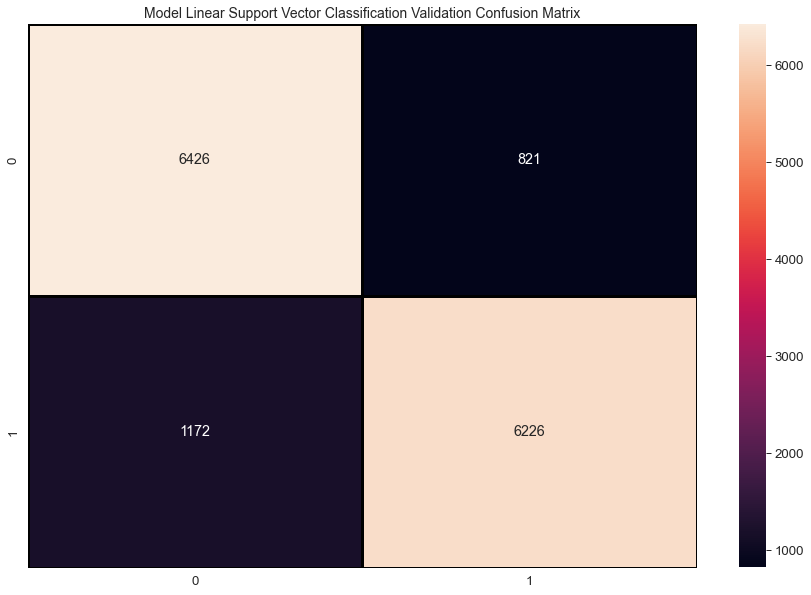

In [114]:
print('Model Linear Support Vector Classificationr Validation Classification Report:\n ', classification_report(y_test, lsvm_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lsvm_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Linear Support Vector Classification Validation Confusion Matrix",fontsize=14)
plt.show()

#### Multilayer Perceptron Classifier

Model Multilayer Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.959     0.948     0.954      7247
           1      0.950     0.960     0.955      7398

    accuracy                          0.954     14645
   macro avg      0.954     0.954     0.954     14645
weighted avg      0.954     0.954     0.954     14645



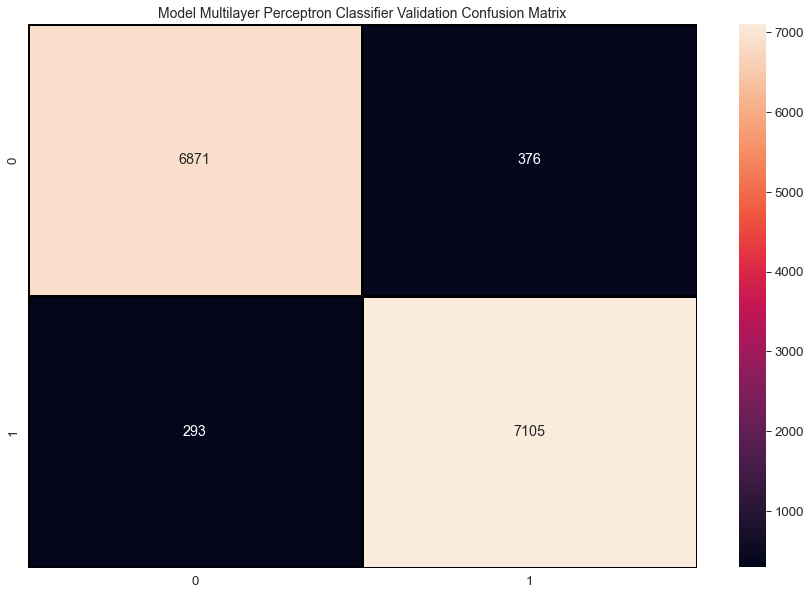

In [115]:
print('Model Multilayer Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, mlp_m_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, mlp_m_pred_vaild_cpu),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title("Model Multilayer Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

# 15. Accuracy Score Summary  

## Standered Machien Learning Models 

### Predication Using CPU

In [116]:
print(tabulate(cpu_ml_m_valid_compare.sort_values(by="Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+------------+
|    | Standered CPU Models                                  |   Accuracy |
|----+-------------------------------------------------------+------------|
|  0 | Random Forest Classifier                              |   0.964152 |
|  4 | Extra Trees Classifier                                |   0.964152 |
| 13 | XGBoost Classifiers                                   |   0.958757 |
|  2 | Histogram-based Gradient Boosting Classification Tree |   0.958416 |
| 16 | Multilayer Perceptron Classifier                      |   0.954319 |
|  8 | Decision Tree Classifier                              |   0.946466 |
| 14 | Support Vector Machines Classifiers                   |   0.94394  |
|  1 | Gradient Boosting Classifier                          |   0.941209 |
|  5 | K Neighbors Classifier                                |   0.938204 |
|  3 | AdaBoost Classifier                                   |   0.923933 |
| 15 | Linea

In [117]:
fig = px.bar(cpu_ml_m_valid_compare.sort_values(by="Accuracy", ascending= True ), x = "Accuracy", y = "Standered CPU Models", title = "Machines Learning CPU Accuracy Validation ")
fig.show()

The results for this project it is showing Random Forest Classifier, Extra Trees Classifier, XGBoost Classifiers with accuracy (96.4, 96.4, and 95.8) respectively.